### Pré-Processando Algo:

##### Aluno: Carlos Eduardo Fontaneli, RA 769949

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import numpy as np

In [3]:
# link do dataset: https://www.kaggle.com/datasets/iamsouravbanerjee/game-of-thrones-dataset
df = pd.read_csv('../data/Game_of_Thrones.csv')

df.head()

,Season,No. of Episode (Season),No. of Episode (Overall),Title of the Episode,Running Time (Minutes),Directed by,Written by,Original Air Date,U.S. Viewers (Millions),Music by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Ordered,Filming Duration,Novel(s) Adapted,Synopsis
0,1,1,1,Winter Is Coming,61,Tim Van Patten,"David Benioff, D. B. Weiss",17-Apr-2011,2.22,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.9,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"North of the Seven Kingdoms of Westeros, Night..."
1,1,2,2,The Kingsroad,55,Tim Van Patten,"David Benioff, D. B. Weiss",24-Apr-2011,2.20,Ramin Djawadi,Alik Sakharov,Oral Norrie Ottey,8.6,100,8.9,"March 2, 2010",Second half of 2010,A Game of Thrones,"Ned, the new Hand of the King, travels to King..."
2,1,3,3,Lord Snow,57,Brian Kirk,"David Benioff, D. B. Weiss",1-May-2011,2.44,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.5,81,8.7,"March 2, 2010",Second half of 2010,A Game of Thrones,Ned attends the King's Small Council and learn...
3,1,4,4,"Cripples, Bastards, and Broken Things",55,Brian Kirk,Bryan Cogman,8-May-2011,2.45,Ramin Djawadi,Marco Pontecorvo,Frances Parker,8.6,100,9.1,"March 2, 2010",Second half of 2010,A Game of Thrones,"While returning to King's Landing, Tyrion stop..."
4,1,5,5,The Wolf and the Lion,54,Brian Kirk,"David Benioff, D. B. Weiss",15-May-2011,2.58,Ramin Djawadi,Marco Pontecorvo,Frances Parker,9.0,95,9.0,"March 2, 2010",Second half of 2010,A Game of Thrones,"King Robert's eunuch spy, Varys, has uncovered..."


In [4]:
# Descrição numérica dos dados
df.describe()

,Season,No. of Episode (Season),No. of Episode (Overall),Running Time (Minutes),U.S. Viewers (Millions),IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,4.205479,5.191781,37.000000,56.945205,6.447808,8.741096,91.972603,7.817808
std,2.191897,2.821827,21.217131,7.185809,2.827372,0.932565,11.499967,1.684186
min,1.000000,1.000000,1.000000,49.000000,2.200000,4.000000,47.000000,2.600000
25%,2.000000,3.000000,19.000000,52.000000,3.900000,8.500000,89.000000,6.500000
50%,4.000000,5.000000,37.000000,55.000000,6.640000,8.800000,96.000000,8.500000
75%,6.000000,7.000000,55.000000,58.000000,7.820000,9.300000,100.000000,9.100000
max,8.000000,10.000000,73.000000,81.000000,13.610000,9.900000,100.000000,9.700000


In [5]:
# Buscando informações sobre o Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Season                               73 non-null     int64  
 1   No. of Episode (Season)              73 non-null     int64  
 2   No. of Episode (Overall)             73 non-null     int64  
 3   Title of the Episode                 73 non-null     object 
 4   Running Time (Minutes)               73 non-null     int64  
 5   Directed by                          73 non-null     object 
 6   Written by                           73 non-null     object 
 7   Original Air Date                    73 non-null     object 
 8   U.S. Viewers (Millions)              73 non-null     float64
 9   Music by                             73 non-null     object 
 10  Cinematography by                    73 non-null     object 
 11  Editing by                        

### Objetivos:

- Buscar traçar relações entre as avaliações dos episódios e alguns de seus atributos;

- Ver a relevância dos profissionais que trabalharam nos episódios e as notas obtidas;

- Analisar a avaliação da série conforme a progressão das temporadas;

Para tanto serão usadas apenas as colunas relativas a temporada do episódio, os profissionais que trabalharam em tais episódios e as notas obtidas.

### Seleção de caracteríticas(manual)

Para selecionar os atributos usado a escolha foi feita manualmente e foram removidos os atributos que não contribuiriam para a análise dos resultados.

In [6]:
# Retirando colunas que contêm informações irrelevantes ou que não serão usadas na análise como por exemplo título
dropped_cols = ['Title of the Episode', 'Original Air Date', 
                'Ordered', 'Filming Duration', 'Novel(s) Adapted', 'Synopsis', 'Music by',
                'Running Time (Minutes)', 'No. of Episode (Overall)', 'U.S. Viewers (Millions)']

final_df = df.drop(dropped_cols, axis=1)

final_df

,Season,No. of Episode (Season),Directed by,Written by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings
0,1,1,Tim Van Patten,"David Benioff, D. B. Weiss",Alik Sakharov,Oral Norrie Ottey,8.9,100,9.1
1,1,2,Tim Van Patten,"David Benioff, D. B. Weiss",Alik Sakharov,Oral Norrie Ottey,8.6,100,8.9
2,1,3,Brian Kirk,"David Benioff, D. B. Weiss",Marco Pontecorvo,Frances Parker,8.5,81,8.7
3,1,4,Brian Kirk,Bryan Cogman,Marco Pontecorvo,Frances Parker,8.6,100,9.1
4,1,5,Brian Kirk,"David Benioff, D. B. Weiss",Marco Pontecorvo,Frances Parker,9.0,95,9.0
...,...,...,...,...,...,...,...,...,...
68,8,2,David Nutter,Bryan Cogman,David Franco,Crispin Green,7.9,87,5.9
69,8,3,Miguel Sapochnik,"David Benioff, D. B. Weiss",Fabian Wagner,Tim Porter,7.5,74,4.2
70,8,4,David Nutter,"David Benioff, D. B. Weiss",David Franco,Katie Weiland,5.5,58,2.9
71,8,5,Miguel Sapochnik,"David Benioff, D. B. Weiss",Fabian Wagner,Tim Porter,6.0,49,3.4


### Discretização / mapeamento do domínio de atributos / OneHotEncode

Serão transformados em valores discretos as colunas com tipo object. 

In [7]:
# Convertendo os atributos categóricos em numericos, para tornar privado os nomes dos profissionais 
# e facilitar na plotagem dos dados
categorical = (final_df.dtypes == 'object')
object_cols = list(categorical[categorical].index)

LE = LabelEncoder()
for i in object_cols:
    final_df[i]=final_df[[i]].apply(LE.fit_transform)

final_df.head()

,Season,No. of Episode (Season),Directed by,Written by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings
0,1,1,19,2,0,6,8.9,100,9.1
1,1,2,19,2,0,6,8.6,100,8.9
2,1,3,3,2,9,1,8.5,81,8.7
3,1,4,3,0,9,1,8.6,100,9.1
4,1,5,3,2,9,1,9.0,95,9.0


### Amostragem

Como não há necessidade de criar mais linhas dado que o dataset está completo, um novo atributo será criado para auxiliar na análise visual dos dados.

In [8]:
# Criando uma nota unificada baseada numa média simples das demais
# Como 'Rotten Tomatoes Rating (Percentage)' tem uma escala de 0-100 é necessário
# dividir a nota por 10 para coloca-la na mesma escala que as demais
final_df['Overall Rating'] = ((final_df['Rotten Tomatoes Rating (Percentage)'] / 10) + 
                      final_df['IMDb Rating'] + 
                      final_df['Metacritic Ratings']) / 3

final_df

,Season,No. of Episode (Season),Directed by,Written by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Overall Rating
0,1,1,19,2,0,6,8.9,100,9.1,9.333333
1,1,2,19,2,0,6,8.6,100,8.9,9.166667
2,1,3,3,2,9,1,8.5,81,8.7,8.433333
3,1,4,3,0,9,1,8.6,100,9.1,9.233333
4,1,5,3,2,9,1,9.0,95,9.0,9.166667
...,...,...,...,...,...,...,...,...,...,...
68,8,2,9,0,3,0,7.9,87,5.9,7.500000
69,8,3,17,2,5,7,7.5,74,4.2,6.366667
70,8,4,9,2,3,4,5.5,58,2.9,4.733333
71,8,5,17,2,5,7,6.0,49,3.4,4.766667


### Normalização das notas

Para ter mais uma medida de análise somou-se todas as notas dos episódios e normalizou-se os resultados.

In [9]:
# Criando uma nota unificada baseada numa média simples das demais
# Como 'Rotten Tomatoes Rating (Percentage)' tem uma escala de 0-100 é necessário
# dividir a nota por 10 para coloca-la na mesma escala que as demais
final_df['Overall Rating Normalized'] = (final_df['Rotten Tomatoes Rating (Percentage)'] + 
                      final_df['IMDb Rating'] + 
                      final_df['Metacritic Ratings'])
scaler = StandardScaler()
# Selecionando apenas a última coluna relativa a soma das notas
scaler.fit(final_df.iloc[:, -1:])
final_df['Overall Rating Normalized'] = scaler.transform(final_df.iloc[:, -1:])

final_df

,Season,No. of Episode (Season),Directed by,Written by,Cinematography by,Editing by,IMDb Rating,Rotten Tomatoes Rating (Percentage),Metacritic Ratings,Overall Rating,Overall Rating Normalized
0,1,1,19,2,0,6,8.9,100,9.1,9.333333,0.708620
1,1,2,19,2,0,6,8.6,100,8.9,9.166667,0.671200
2,1,3,3,2,9,1,8.5,81,8.7,8.433333,-0.773207
3,1,4,3,0,9,1,8.6,100,9.1,9.233333,0.686168
4,1,5,3,2,9,1,9.0,95,9.0,9.166667,0.334421
...,...,...,...,...,...,...,...,...,...,...,...
68,8,2,9,0,3,0,7.9,87,5.9,7.500000,-0.578624
69,8,3,17,2,5,7,7.5,74,4.2,6.366667,-1.708704
70,8,4,9,2,3,4,5.5,58,2.9,4.733333,-3.153111
71,8,5,17,2,5,7,6.0,49,3.4,4.766667,-3.751829


#### Avaliações das temporadas

Dado os gráficos das notas de cada episódio e dada a média da avaliação(traçado vermelho) é possível perceber que as primeiras temporadas apresentam-se acima da média e com uma tendência de melhora da avaliação até a quinta temporada. Entretanto, a partir da sexta temporada as avaliações, de forma geral, concentram-se mais abaixo da média da série, sendo as duas últimas temporadas as piores avaliadas.

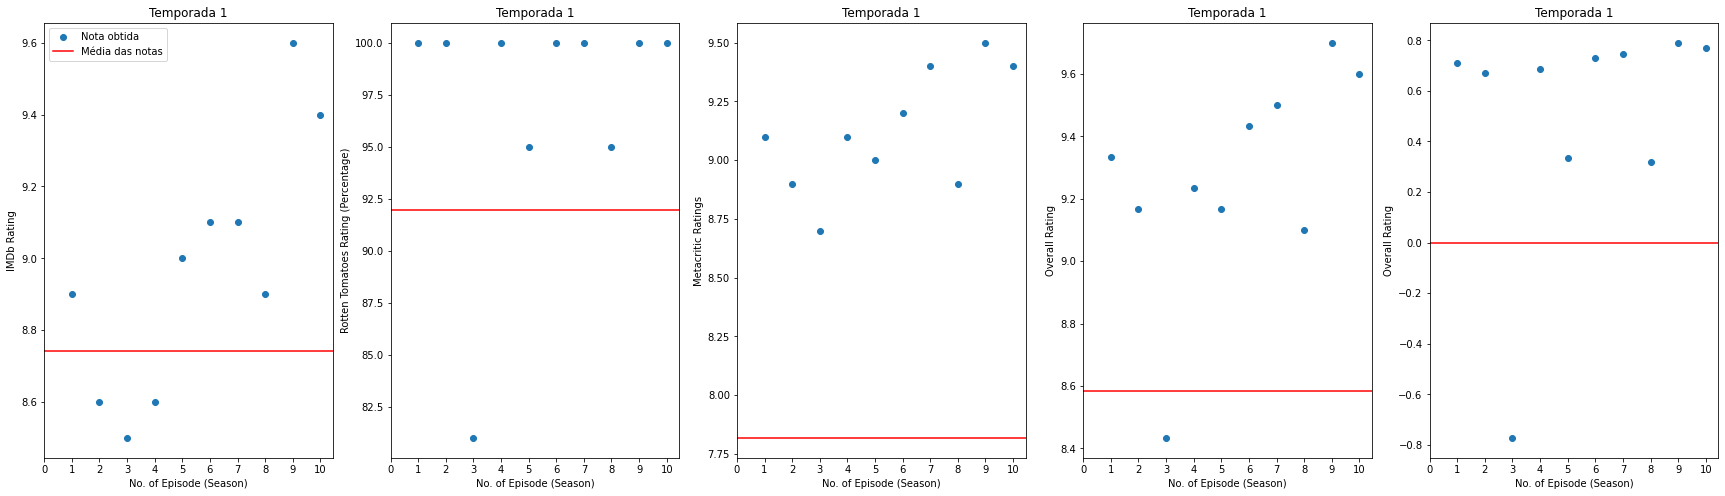

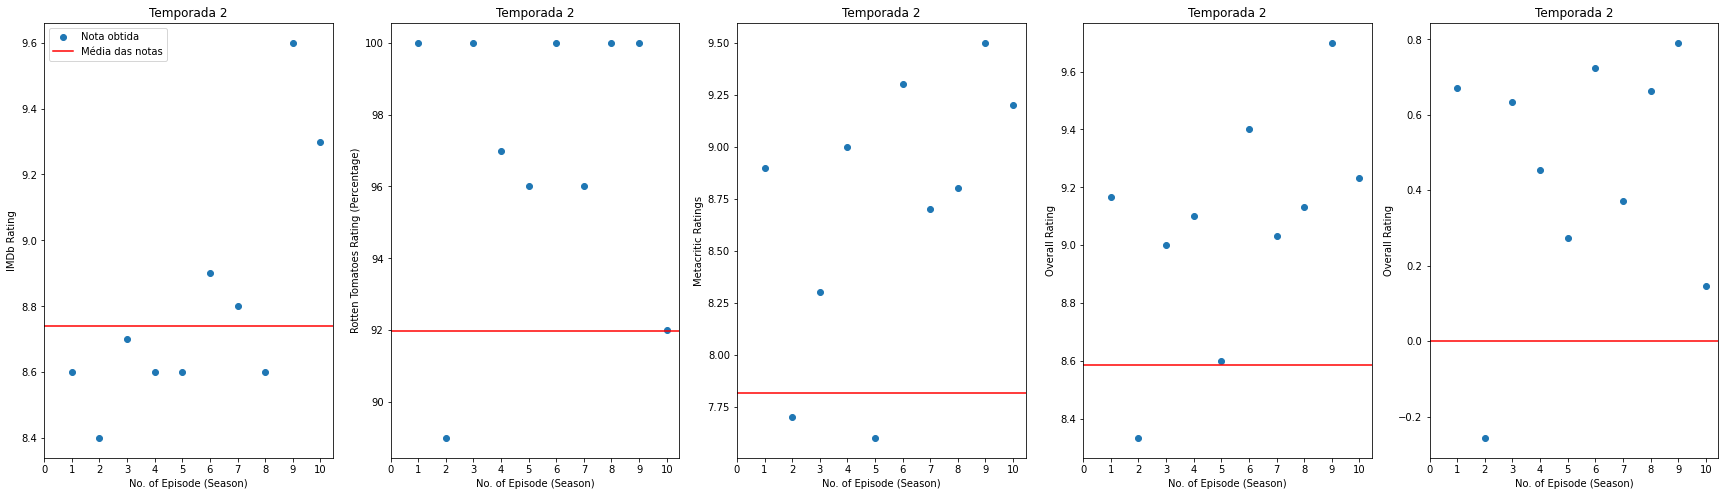

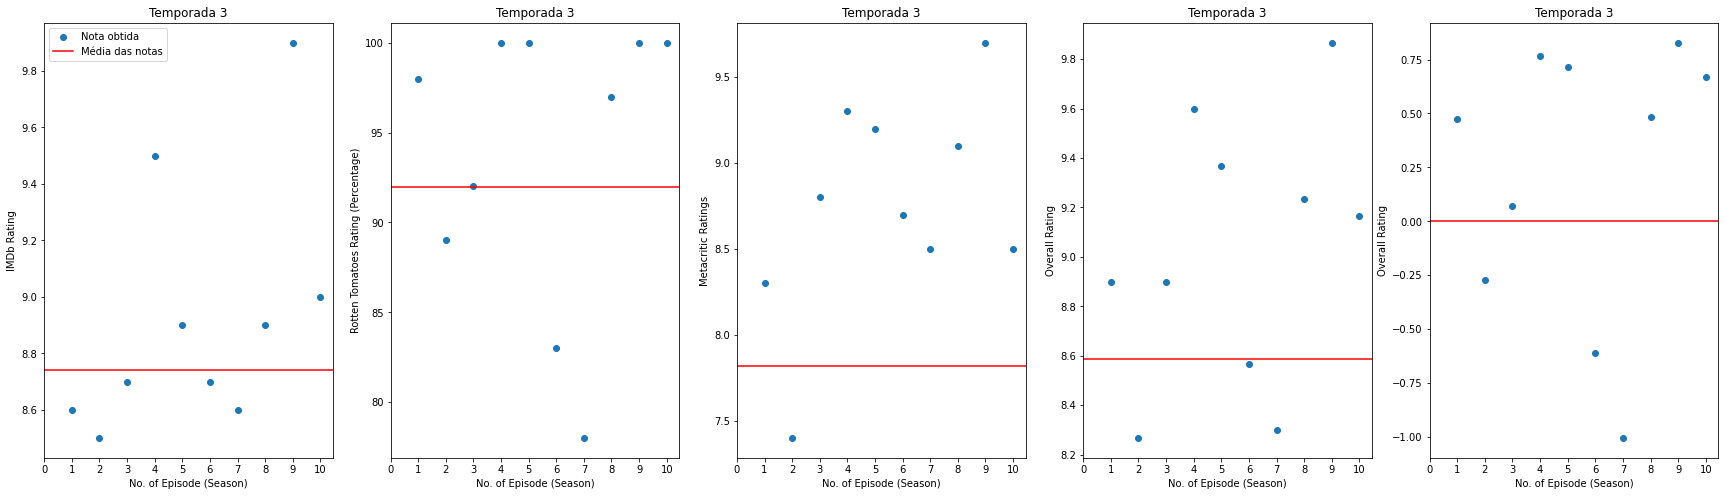

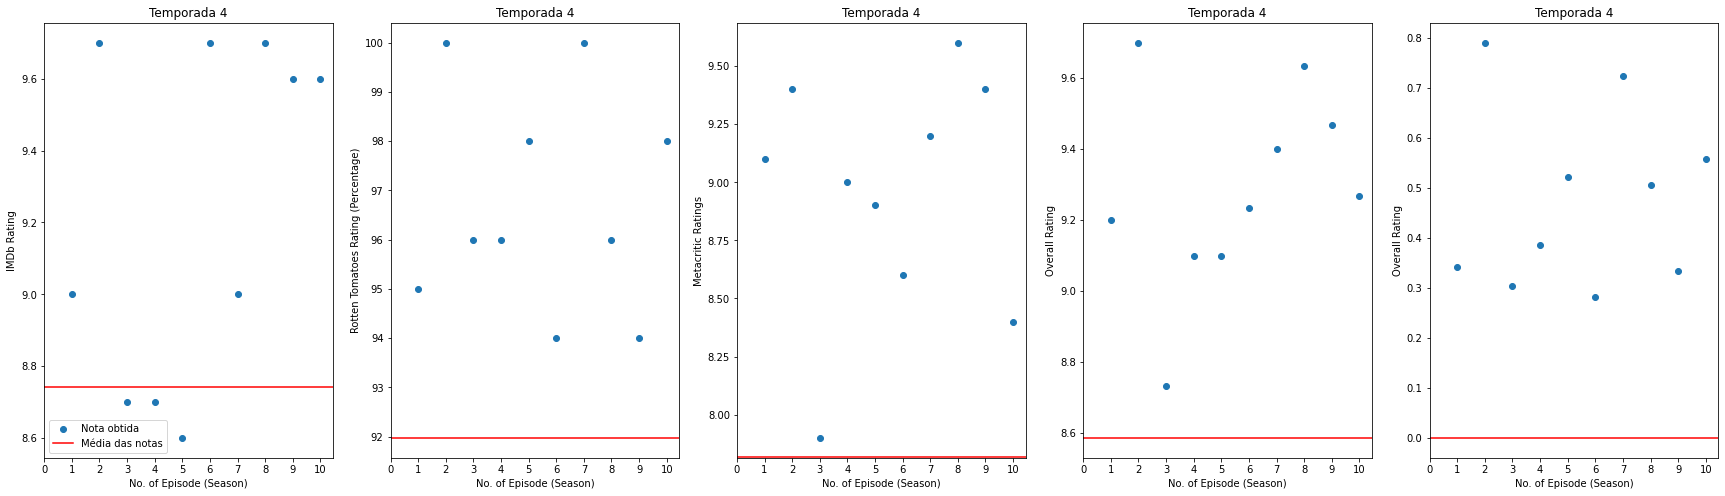

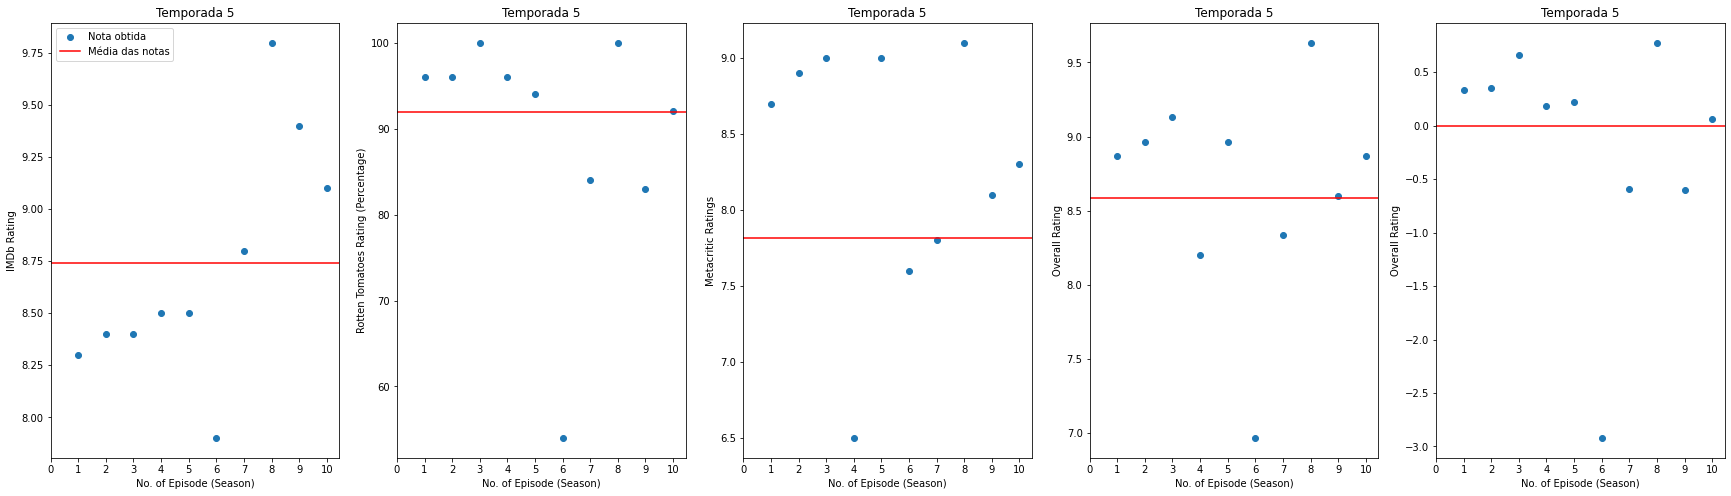

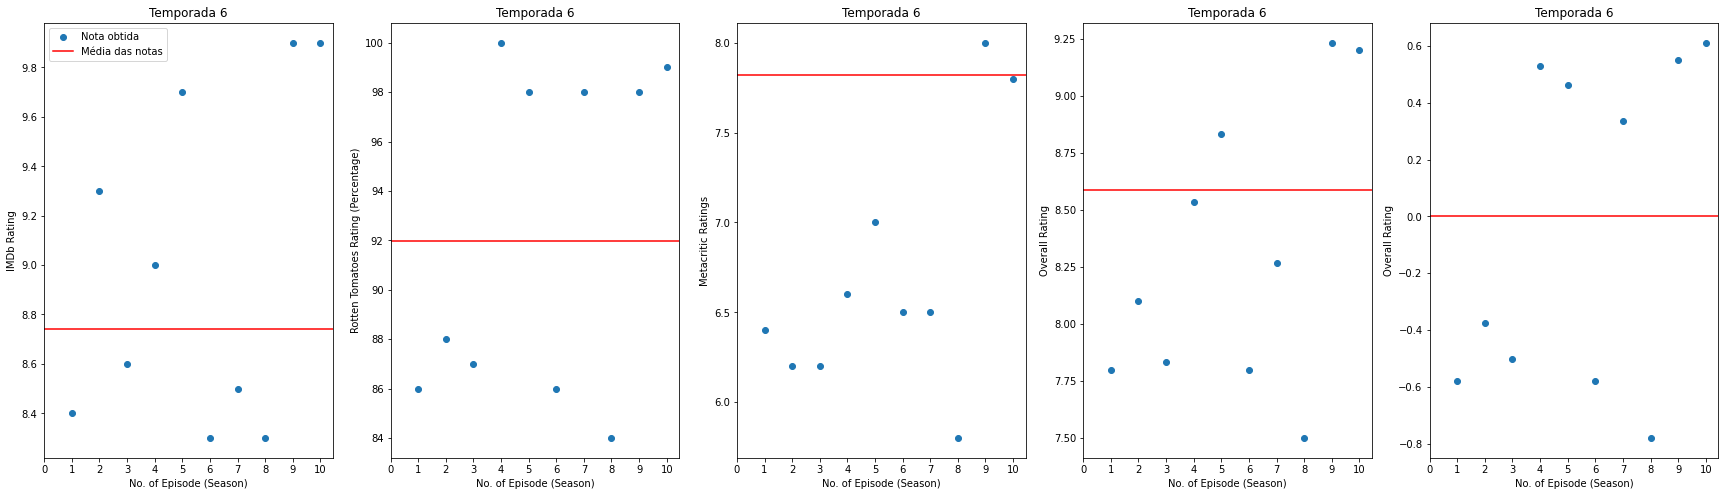

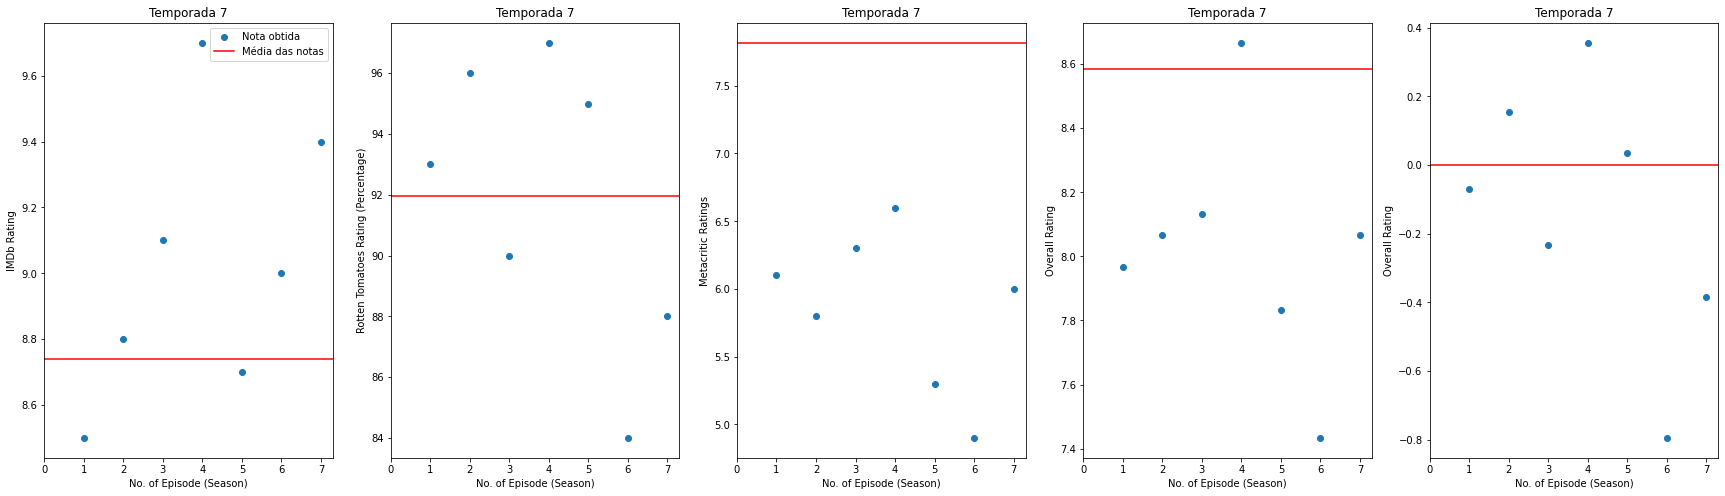

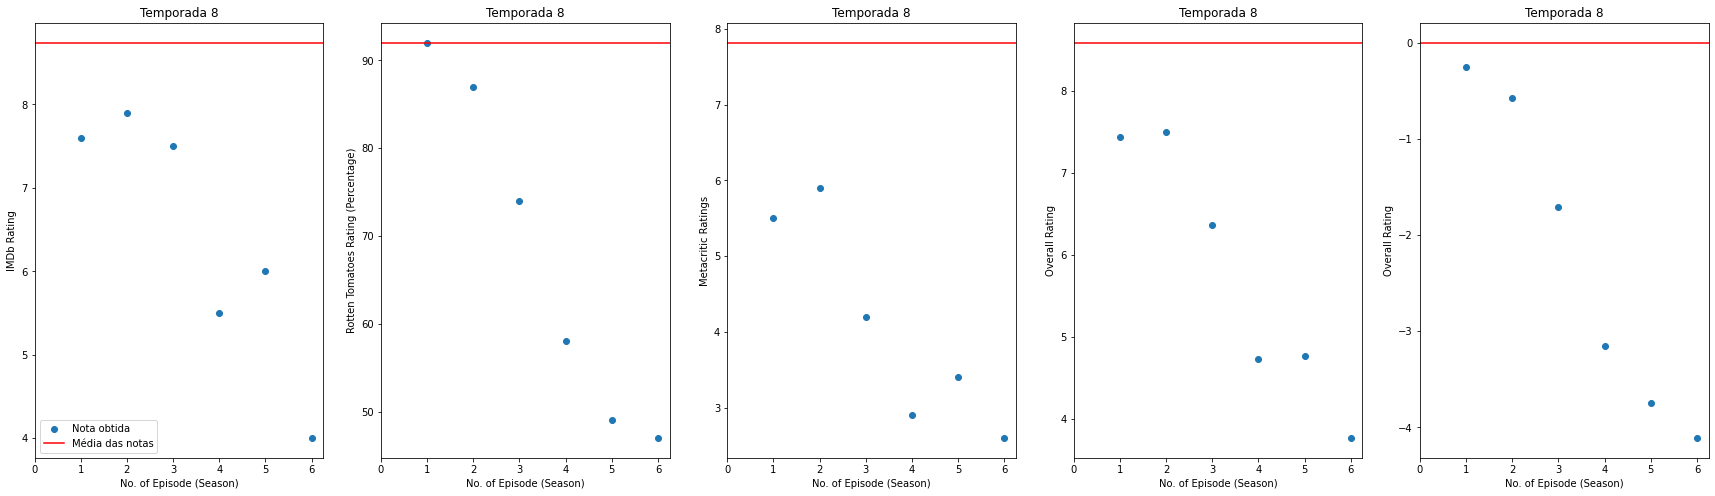

In [18]:
for label, df in final_df.groupby('Season'):
    fig, ax = plt.subplots(figsize=(30,8))
    # IMDb Rating
    plt.subplot(1, 5, 1)
    # Gráfico de pontos
    plt.scatter(x = df['No. of Episode (Season)'], y = df['IMDb Rating'], label='Nota obtida')
    
    # Configurando a escala do eixo x
    plt.xticks(range(0, max(df['No. of Episode (Season)']) + 1, 1))
    # Título
    plt.title(f'Temporada {label}')
    labels = ["Nota obtida", "Média geral das notas"]
    handles, _ = ax.get_legend_handles_labels()

    # Slice list to remove first handle
    plt.legend(handles = handles[1:], labels = labels)
    # Títulos dos eixos
    plt.xlabel('No. of Episode (Season)')
    plt.ylabel('IMDb Rating')
    # Traçado da média da nota
    plt.axhline(final_df["IMDb Rating"].mean(), color='r', label='Média das notas');
    plt.legend()
    
    # Rotten Tomatoes Rating (Percentage)
    plt.subplot(1, 5, 2)
    plt.scatter(x = df['No. of Episode (Season)'], y = df['Rotten Tomatoes Rating (Percentage)'])
    plt.xticks(range(0, max(df['No. of Episode (Season)']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('No. of Episode (Season)')
    plt.ylabel('Rotten Tomatoes Rating (Percentage)')
    plt.axhline(final_df["Rotten Tomatoes Rating (Percentage)"].mean(), color='r');
    
    # Rotten Tomatoes Rating (Percentage)
    plt.subplot(1, 5, 3)
    plt.scatter(x = df['No. of Episode (Season)'], y = df['Metacritic Ratings'])
    plt.xticks(range(0, max(df['No. of Episode (Season)']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('No. of Episode (Season)')
    plt.ylabel('Metacritic Ratings')
    plt.axhline(final_df["Metacritic Ratings"].mean(), color='r');
    
    # Overall Rating
    plt.subplot(1, 5, 4)
    plt.scatter(x = df['No. of Episode (Season)'], y = df['Overall Rating'])
    plt.xticks(range(0, max(df['No. of Episode (Season)']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('No. of Episode (Season)')
    plt.ylabel('Overall Rating')
    plt.axhline(final_df["Overall Rating"].mean(), color='r');
    
    # Overall Rating Normalized
    plt.subplot(1, 5, 5)
    plt.scatter(x = df['No. of Episode (Season)'], y = df['Overall Rating Normalized'])
    plt.xticks(range(0, max(df['No. of Episode (Season)']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('No. of Episode (Season)')
    plt.ylabel('Overall Rating Normalized')
    plt.axhline(final_df["Overall Rating Normalized"].mean(), color='r');
    _ = plt.show()

In [ ]:
4, 2)
    plt.scatter(x = df['No. of Episode (Season)'], y = df['Rotten Tomatoes Rating (Percentage)'])
    plt.xticks(range(0, max(df['No. of Episode (Season)']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('No. of Episode (Season)')
    plt.ylabel('Rotten Tomatoes Rating (Percentage)')
    plt.axhline(final_df["Rotten Tomatoes Rating (Percentage)"].mean(), color='r');
    
    # Rotten Tomatoes Rating (Percentage)
    plt.subplot(1, 4, 3)
    plt.scatter(x = df['No. of Episode (Season)'], y = df['Metacritic Ratings'])
    plt.xticks(range(0, max(df['No. of Episode (Season)']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('No. of Episode (Season)')
    plt.ylabel('Metacritic Ratings')
    plt.axhline(final_df["Metacritic Ratings"].mean(), color='r');
    
    # Overall Rating
    plt.subplot(1, 4, 4)
    plt.scatter(x = df['No. of Episode (Season)'], y = df['Overall Rating'])
    plt.xticks(range(0, max(df['No. of Episode (Season)']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('No. of Episode (Season)')
    plt.ylabel('Overall Rating')
    plt.axhline(final_df["Overall Rating"].mean(), color='r');
    _ = plt.show()
    
    # Overall Rating Normalized
    plt.subplot(1, 4, 4)
    plt.scatter(x = df['No. of Episode (Season)'], y = df['Overall Rating Normalized'])
    plt.xticks(range(0, max(df['No. of Episode (Season)']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('No. of Episode (Season)')
    plt.ylabel('Overall Rating')
    plt.axhline(final_df["Overall Rating Normalized"].mean(), color='r');
    _ = plt.show()

### Written by 

Abaixo segue os gráficos relativos as notas obtidas por episódio em cada temporada dado o escritor daquele episódio.
O possível perceber que a partir da quinta temporada há uma diminuição no número de escritores e a partir da sexta temporada escritores com notas elevadas em seus episódios das temporadas iniciais começam a apresentar episódios com notas baixas como é o caso do escritor 2.

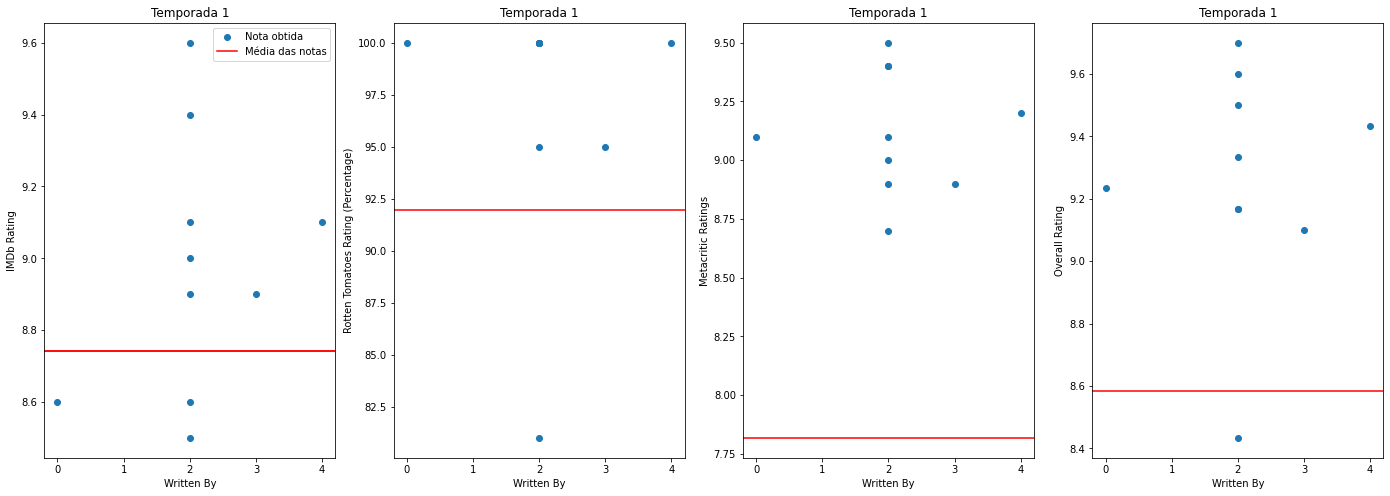

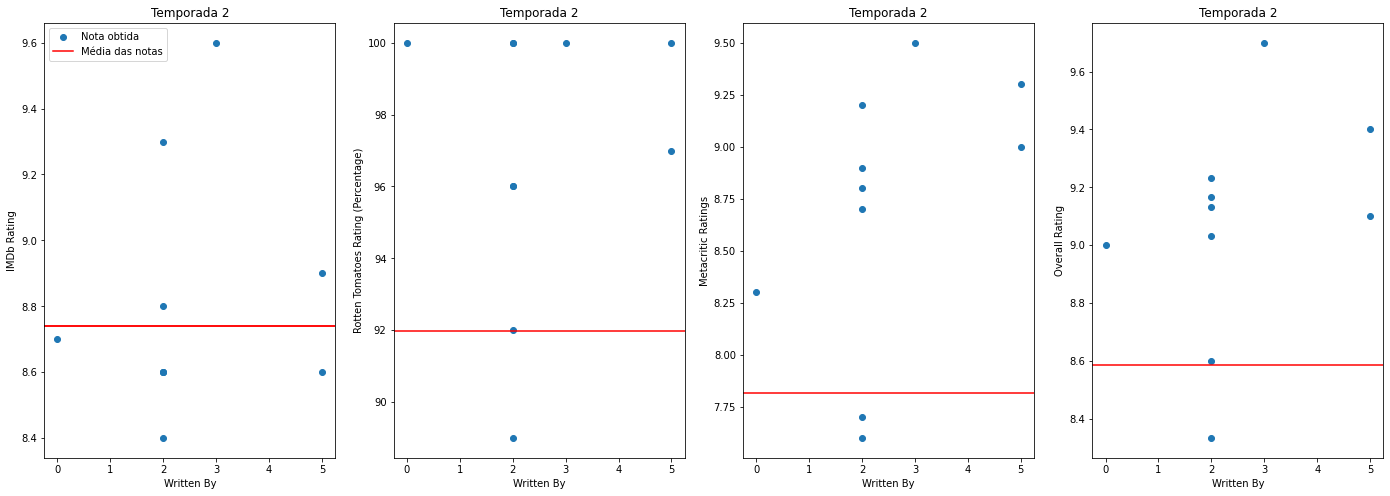

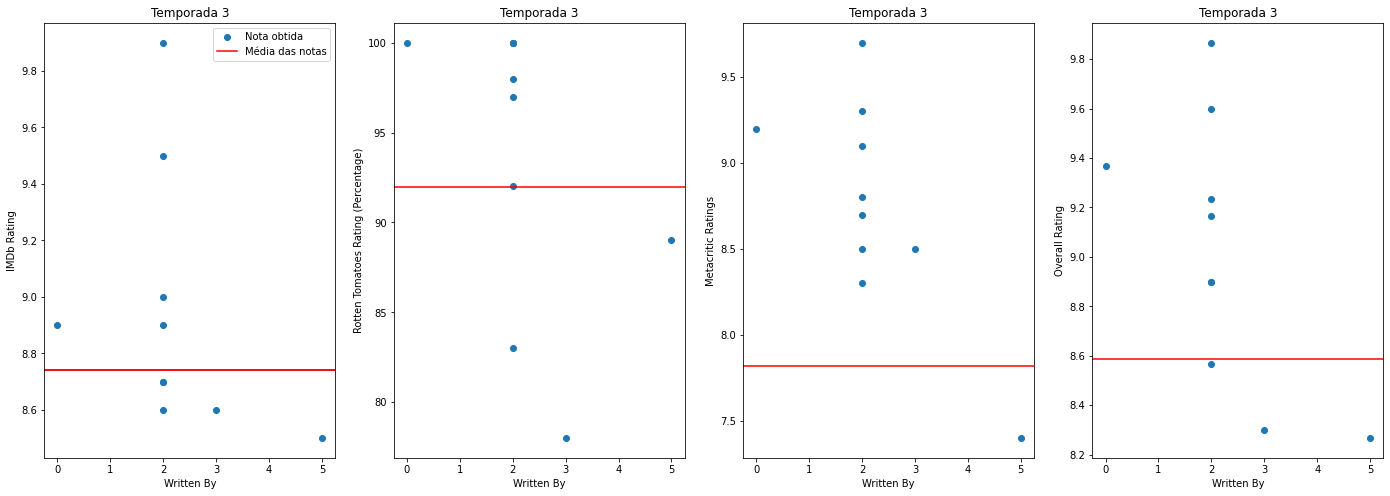

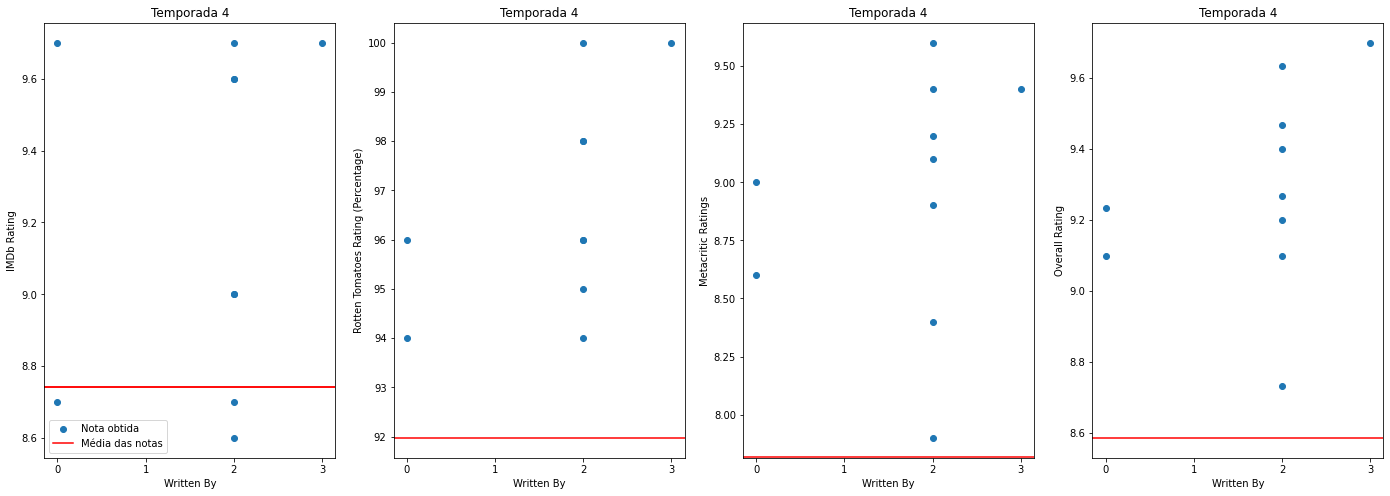

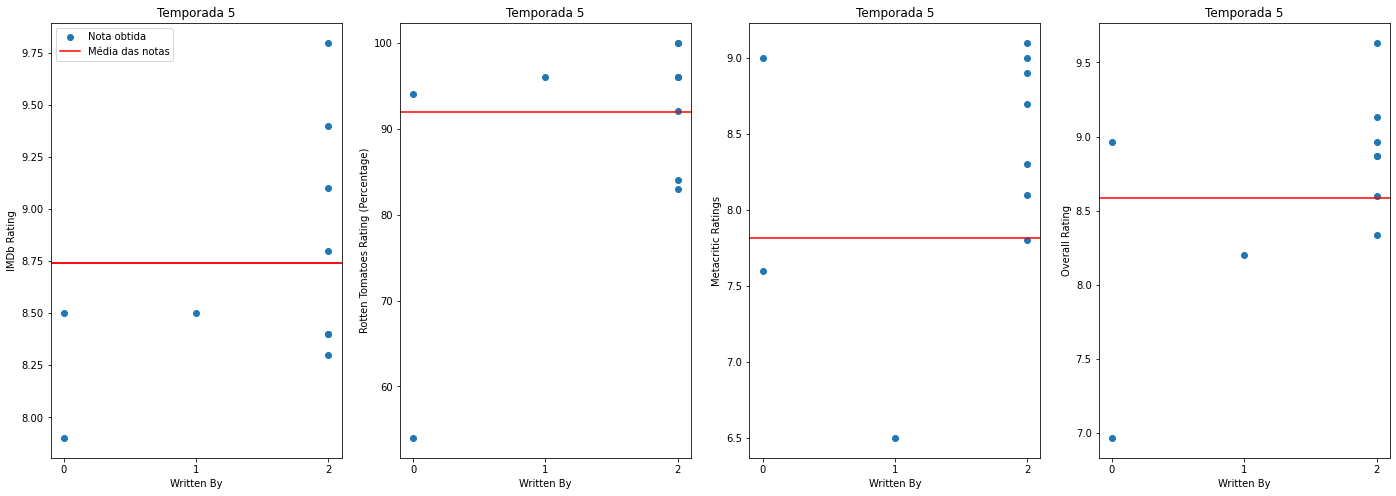

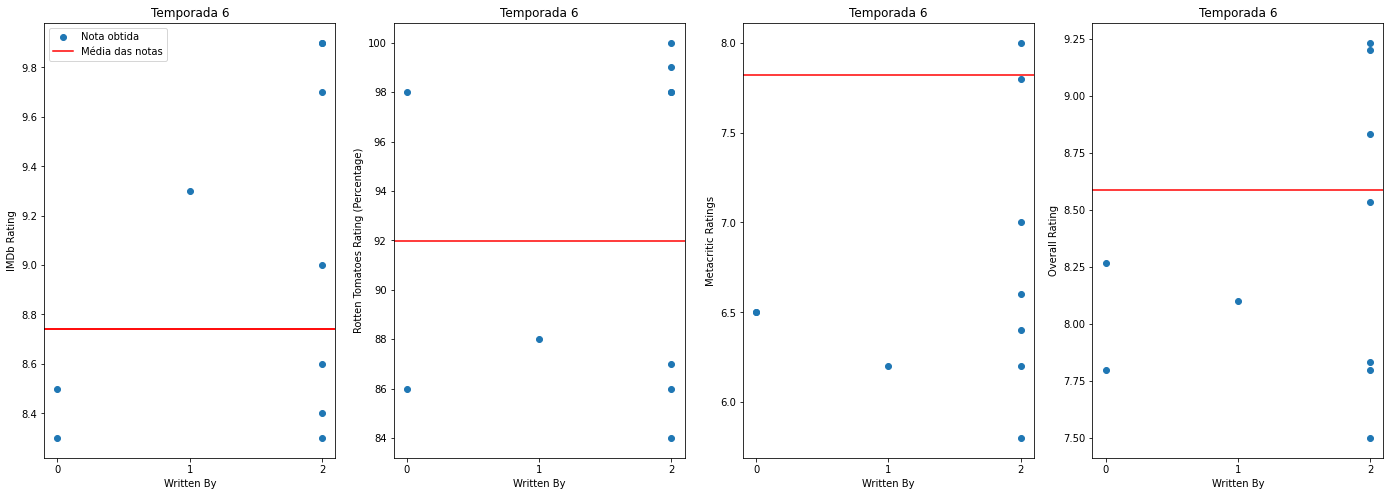

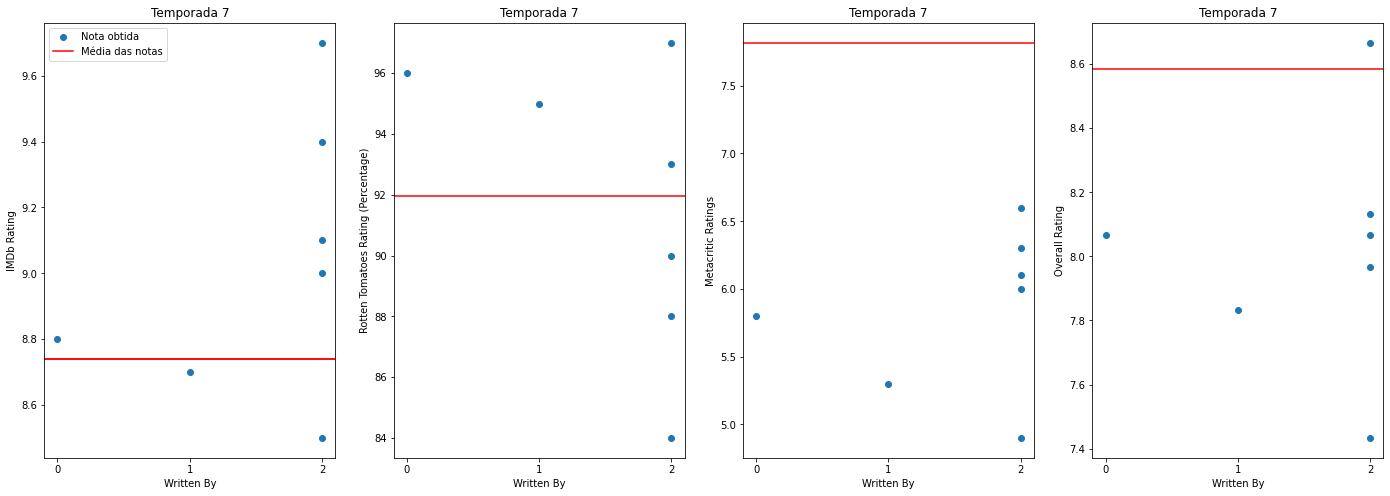

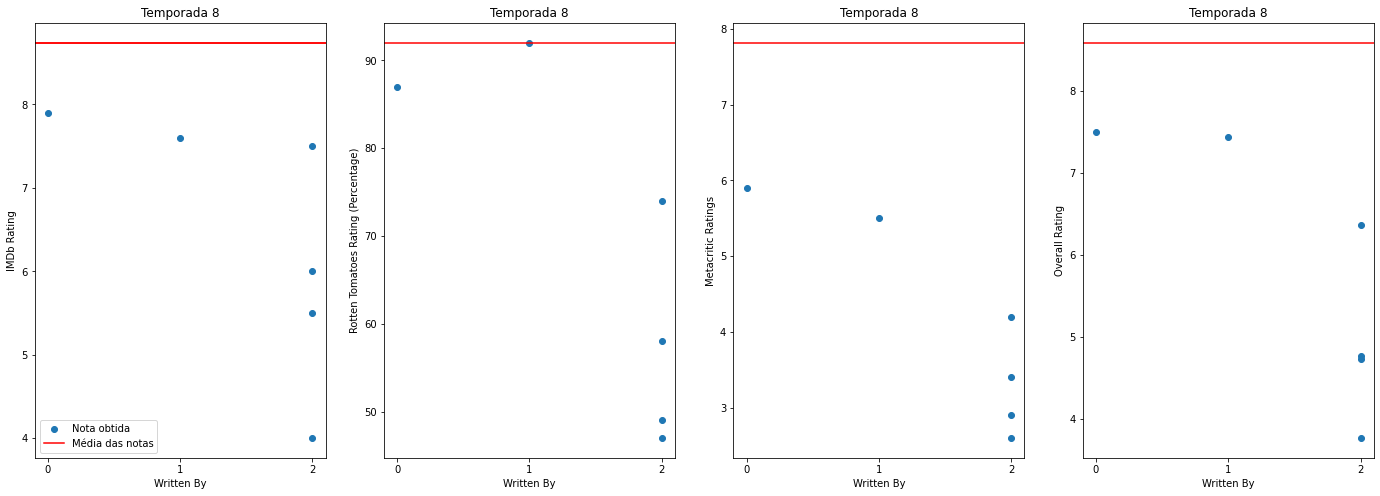

In [11]:
for label, df in final_df.groupby('Season'):
    fig, ax = plt.subplots(figsize=(24,8))
    # IMDb Rating
    plt.subplot(1, 4, 1)
    plt.scatter(x = df['Written by'], y = df['IMDb Rating'], label='Nota obtida')
    plt.xticks(range(0, max(df['Written by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Written By')
    plt.ylabel('IMDb Rating')
    plt.axhline(final_df["IMDb Rating"].mean(), color='r');
    plt.axhline(final_df["IMDb Rating"].mean(), color='r', label='Média das notas');
    plt.legend()
    
    # Rotten Tomatoes Rating (Percentage)
    plt.subplot(1, 4, 2)
    plt.scatter(x = df['Written by'], y = df['Rotten Tomatoes Rating (Percentage)'])
    plt.xticks(range(0, max(df['Written by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Written By')
    plt.ylabel('Rotten Tomatoes Rating (Percentage)')
    plt.axhline(final_df["Rotten Tomatoes Rating (Percentage)"].mean(), color='r');
    
    # Rotten Tomatoes Rating (Percentage)
    plt.subplot(1, 4, 3)
    plt.scatter(x = df['Written by'], y = df['Metacritic Ratings'])
    plt.xticks(range(0, max(df['Written by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Written By')
    plt.ylabel('Metacritic Ratings')
    plt.axhline(final_df["Metacritic Ratings"].mean(), color='r');
    
    # Overall Rating
    plt.subplot(1, 4, 4)
    plt.scatter(x = df['Written by'], y = df['Overall Rating'])
    plt.xticks(range(0, max(df['Written by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Written By')
    plt.ylabel('Overall Rating')
    plt.axhline(final_df["Overall Rating"].mean(), color='r');
    _ = plt.show()

### Directed by

É possível perceber que os episódios com maiores notas nas temporadas iniciais tiveram como diretores os indivíduos 0, 1 e 2 e nas temporas finais com as menores notas tais diretores trabalharam em poucos ou nenhum dos episódios. Os diretores com as menores notas concentram-se a partir do 10 indivíduo e possuem uma atuação maior nos episódios das temporadas finais, traçando uma possível relação entre o trabalho realizado por eles e as notas baixas. 

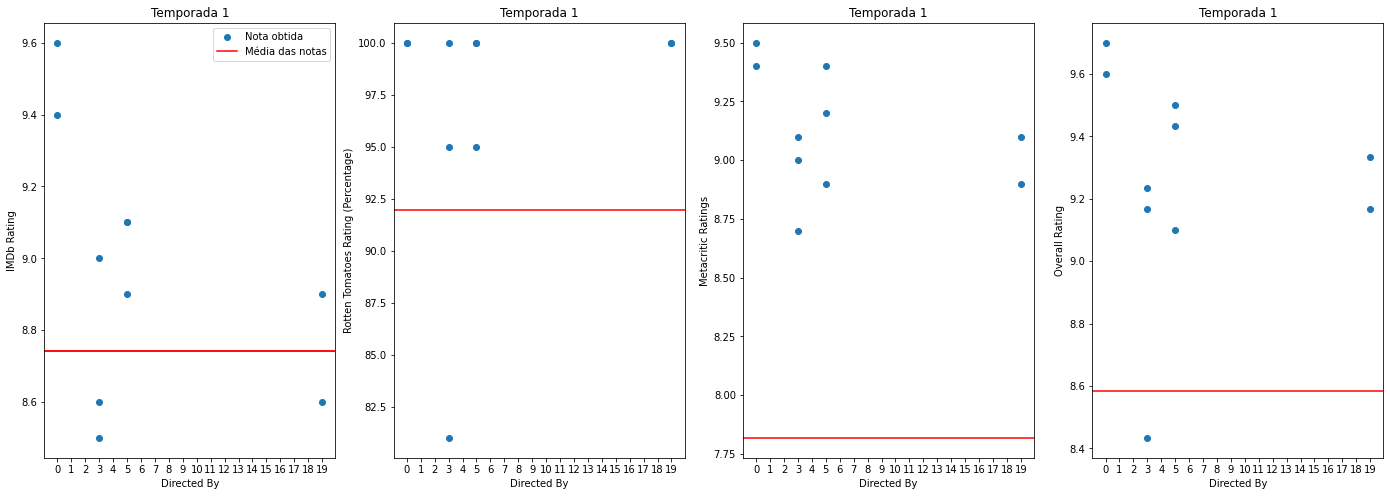

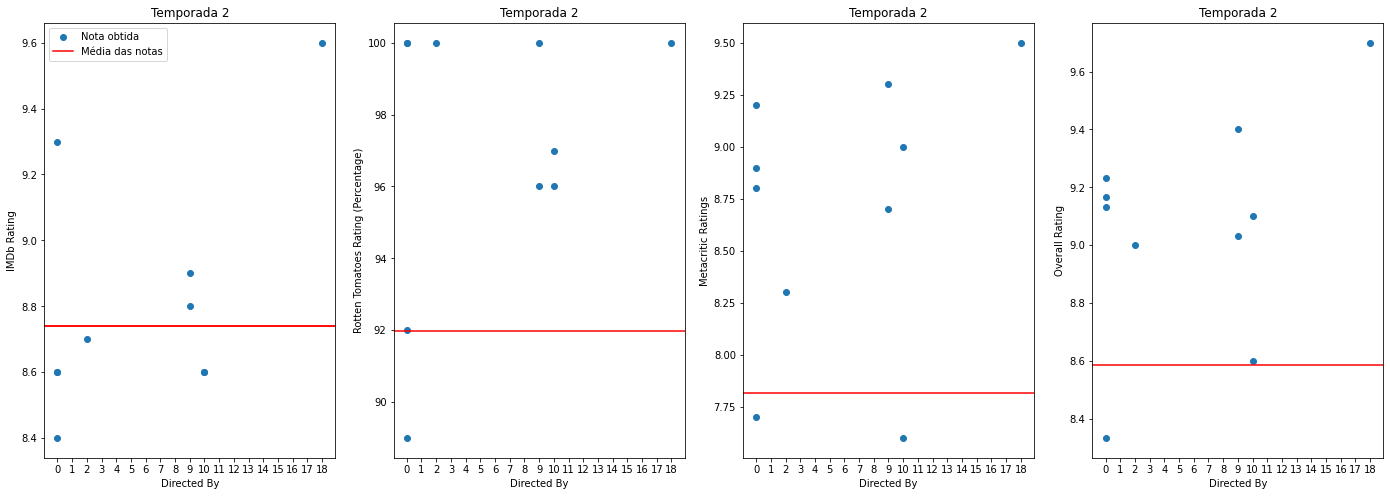

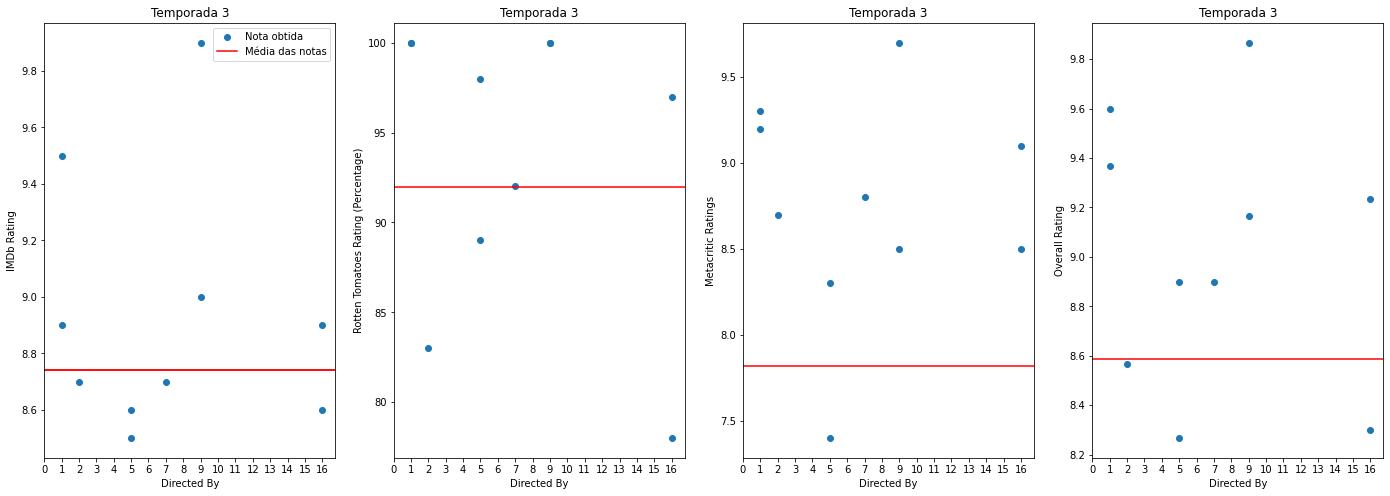

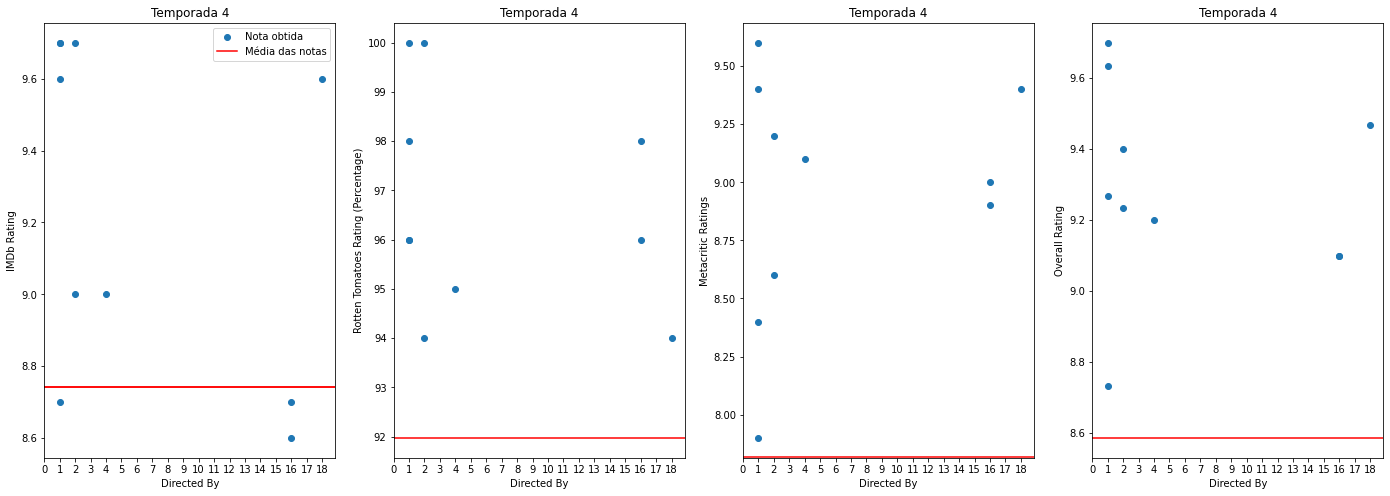

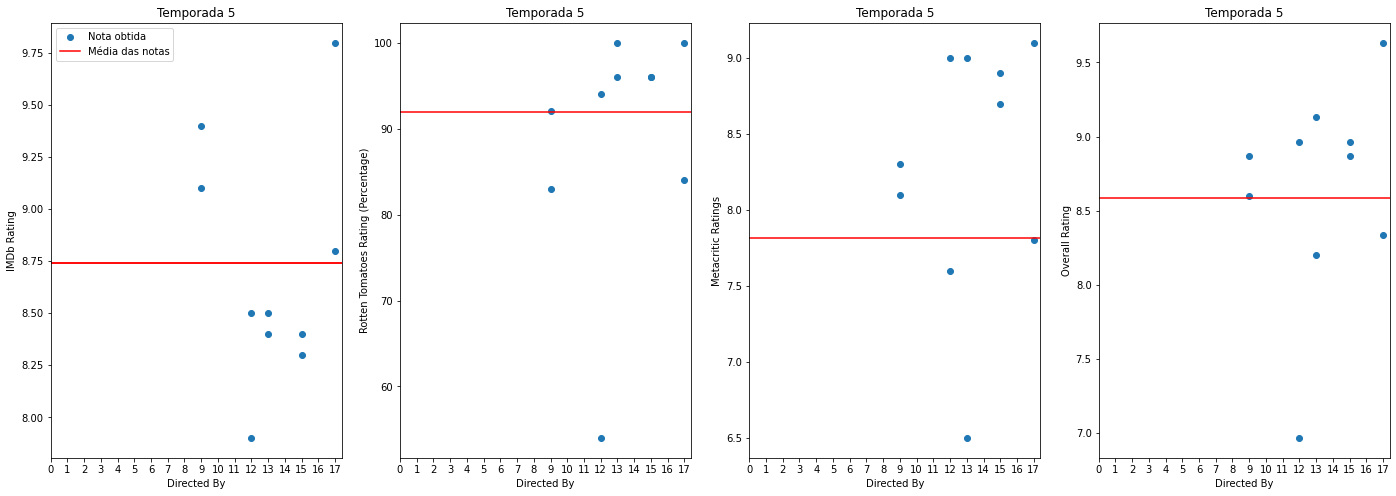

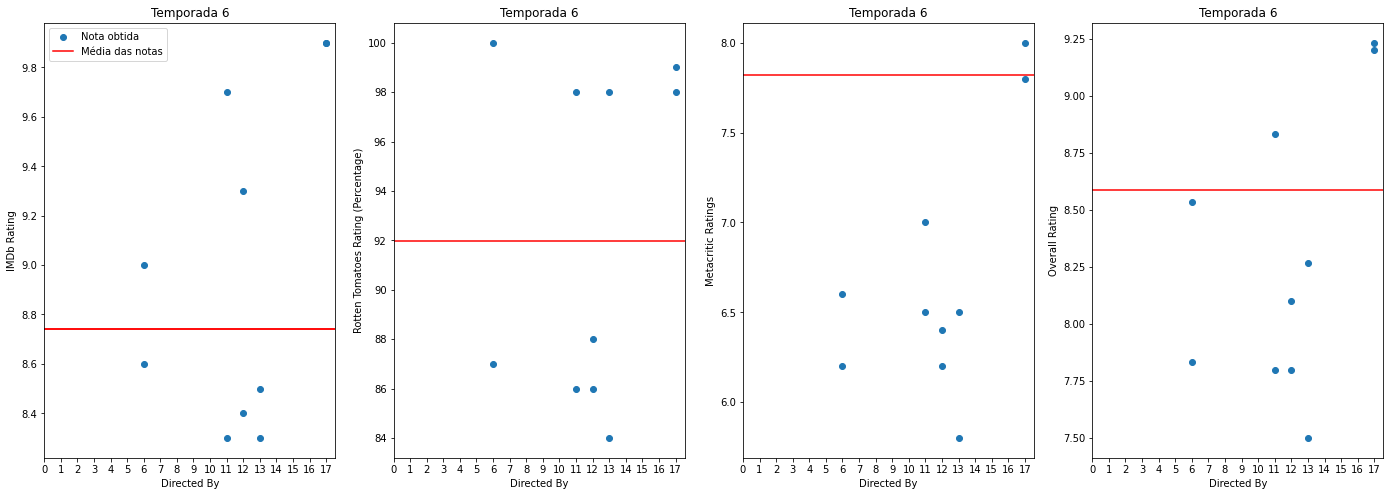

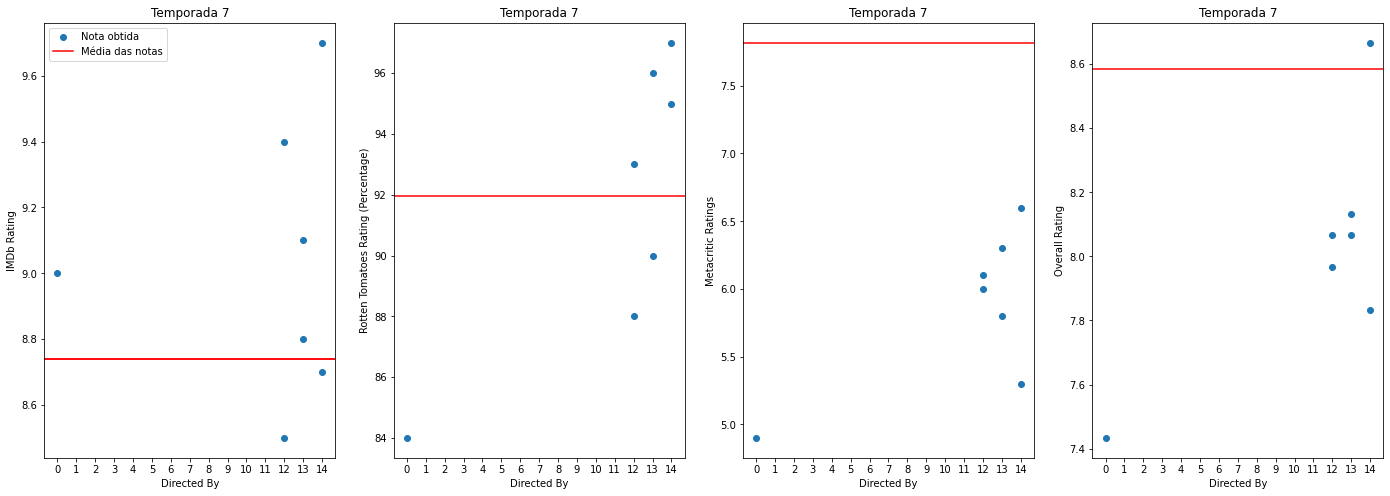

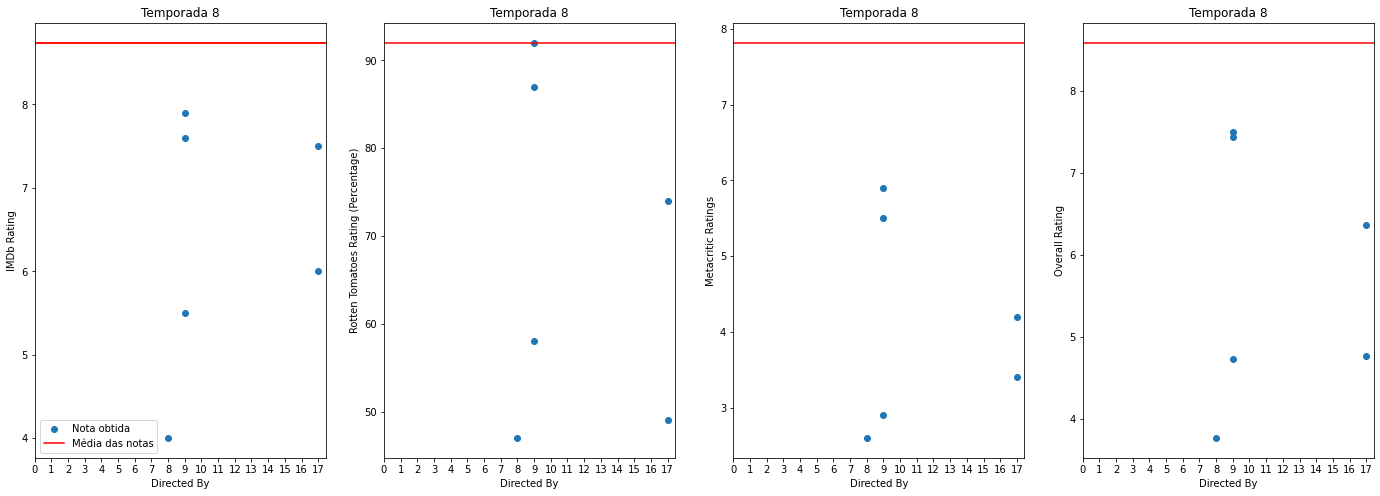

In [12]:
for label, df in final_df.groupby('Season'):
    fig, ax = plt.subplots(figsize=(24,8))
    # IMDb Rating
    plt.subplot(1, 4, 1)
    plt.scatter(x = df['Directed by'], y = df['IMDb Rating'], label='Nota obtida')
    plt.xticks(range(0, max(df['Directed by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Directed By')
    plt.ylabel('IMDb Rating')
    plt.axhline(final_df["IMDb Rating"].mean(), color='r');
    plt.axhline(final_df["IMDb Rating"].mean(), color='r', label='Média das notas');
    plt.legend()
    
    # Rotten Tomatoes Rating (Percentage)
    plt.subplot(1, 4, 2)
    plt.scatter(x = df['Directed by'], y = df['Rotten Tomatoes Rating (Percentage)'])
    plt.xticks(range(0, max(df['Directed by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Directed By')
    plt.ylabel('Rotten Tomatoes Rating (Percentage)')
    plt.axhline(final_df["Rotten Tomatoes Rating (Percentage)"].mean(), color='r');
    
    # Rotten Tomatoes Rating (Percentage)
    plt.subplot(1, 4, 3)
    plt.scatter(x = df['Directed by'], y = df['Metacritic Ratings'])
    plt.xticks(range(0, max(df['Directed by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Directed By')
    plt.ylabel('Metacritic Ratings')
    plt.axhline(final_df["Metacritic Ratings"].mean(), color='r');
    
    # Overall Rating
    plt.subplot(1, 4, 4)
    plt.scatter(x = df['Directed by'], y = df['Overall Rating'])
    plt.xticks(range(0, max(df['Directed by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Directed By')
    plt.ylabel('Overall Rating')
    plt.axhline(final_df["Overall Rating"].mean(), color='r');
    _ = plt.show()

### Editing by

As notas obtidas nos episódios dados os editores estão bastante esparsadas, assim como a atuação dos editores ao longo das temporadas sendo difícil traçar alguma correlação entre a avaliação dos episódios e as notas obtidas por eles.

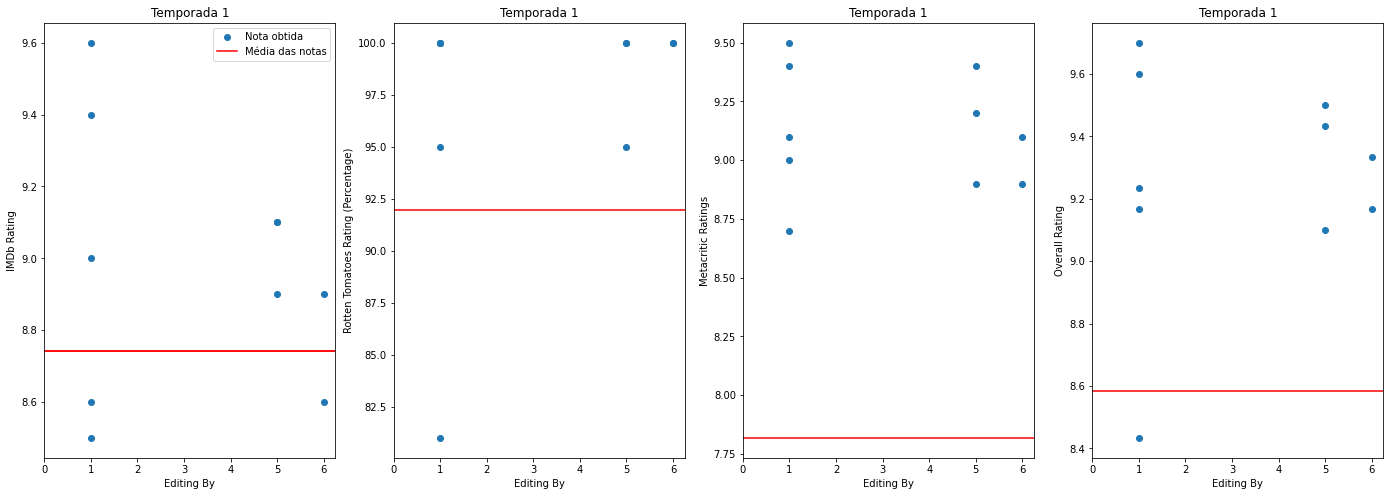

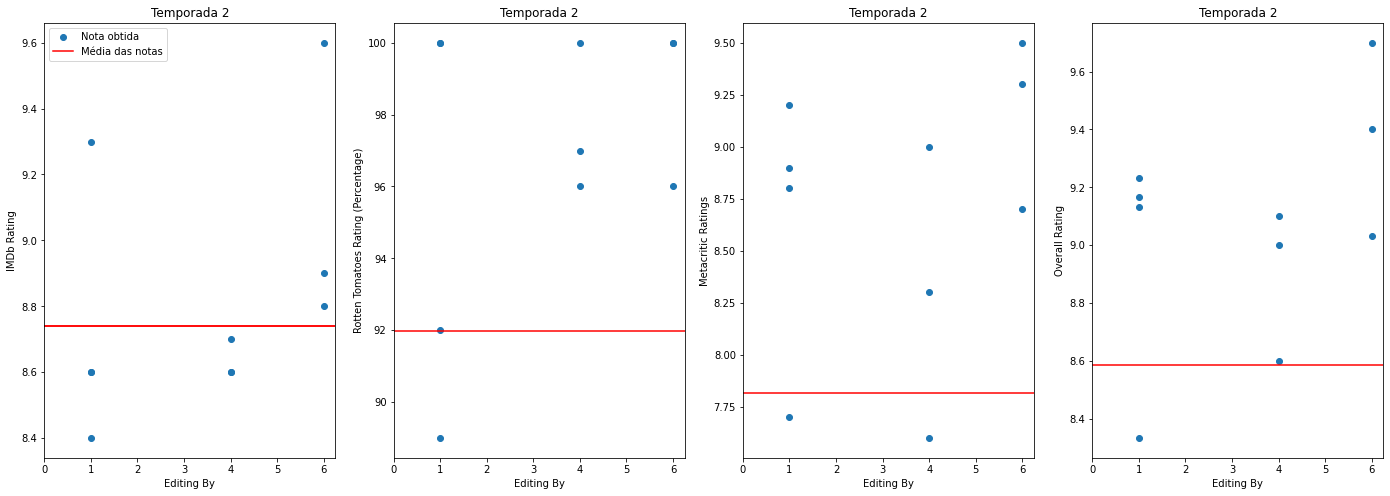

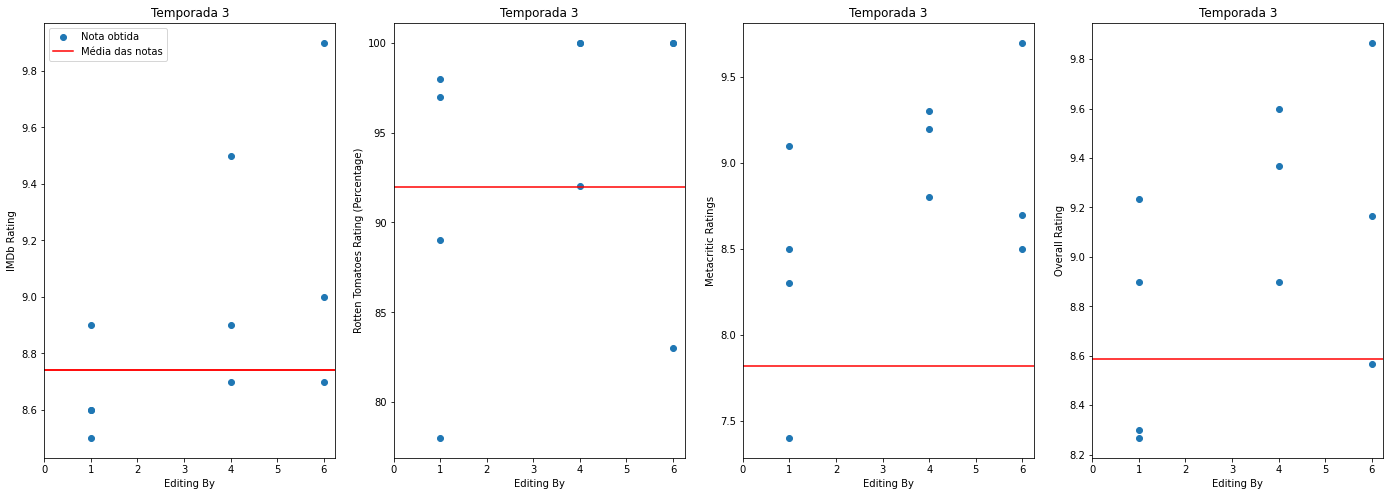

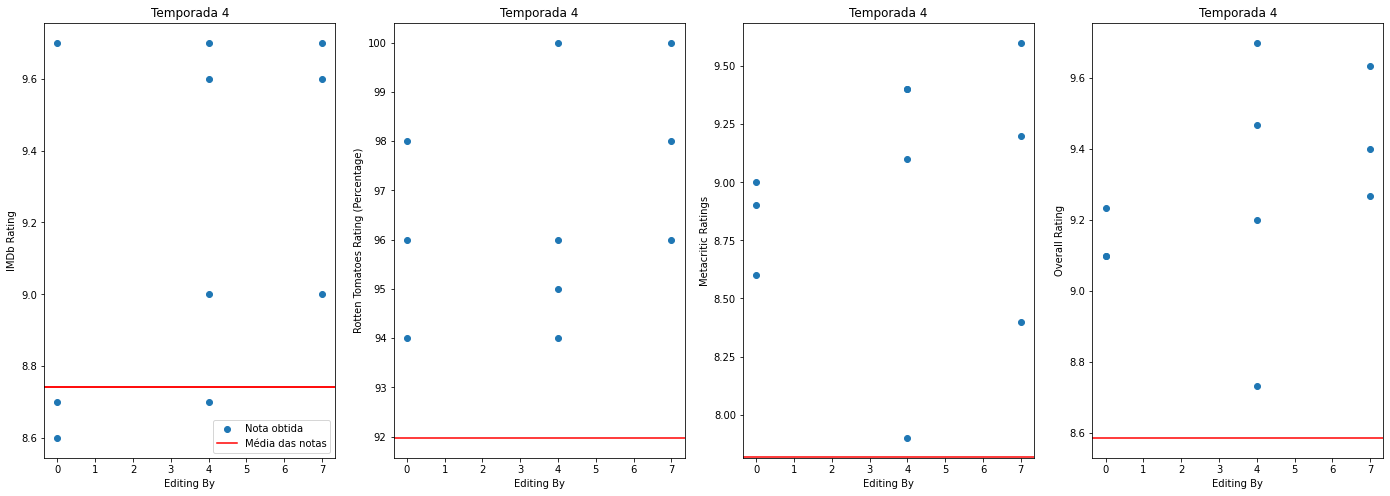

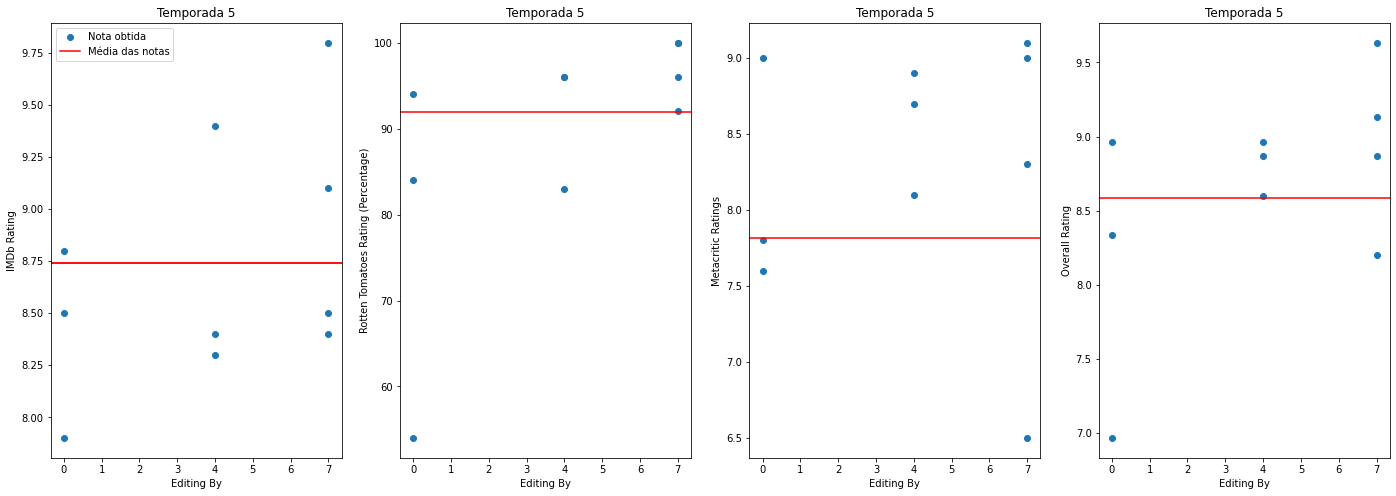

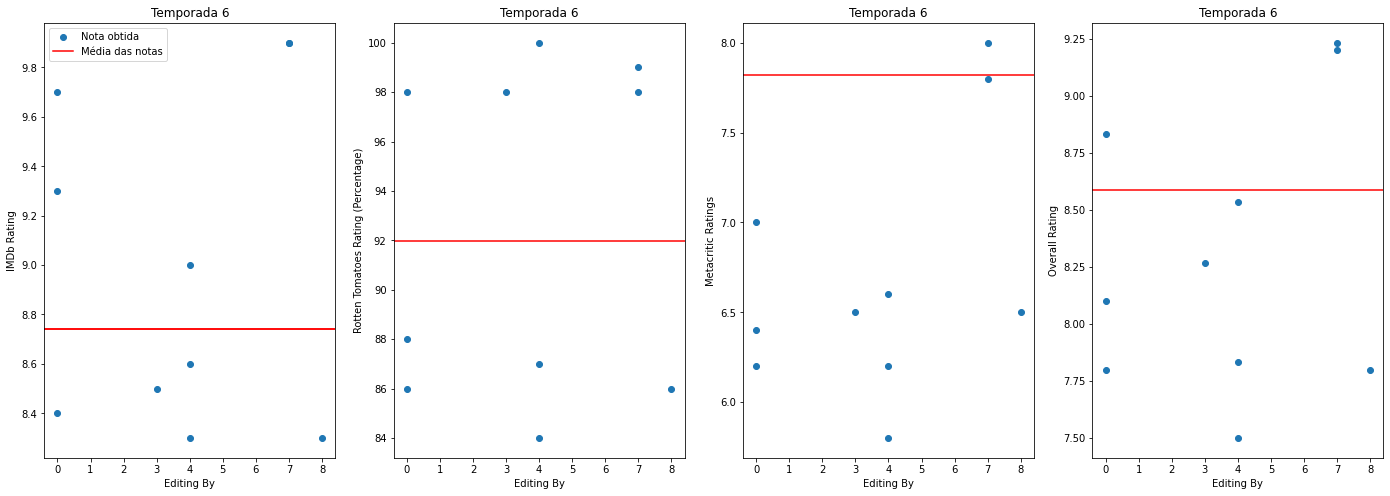

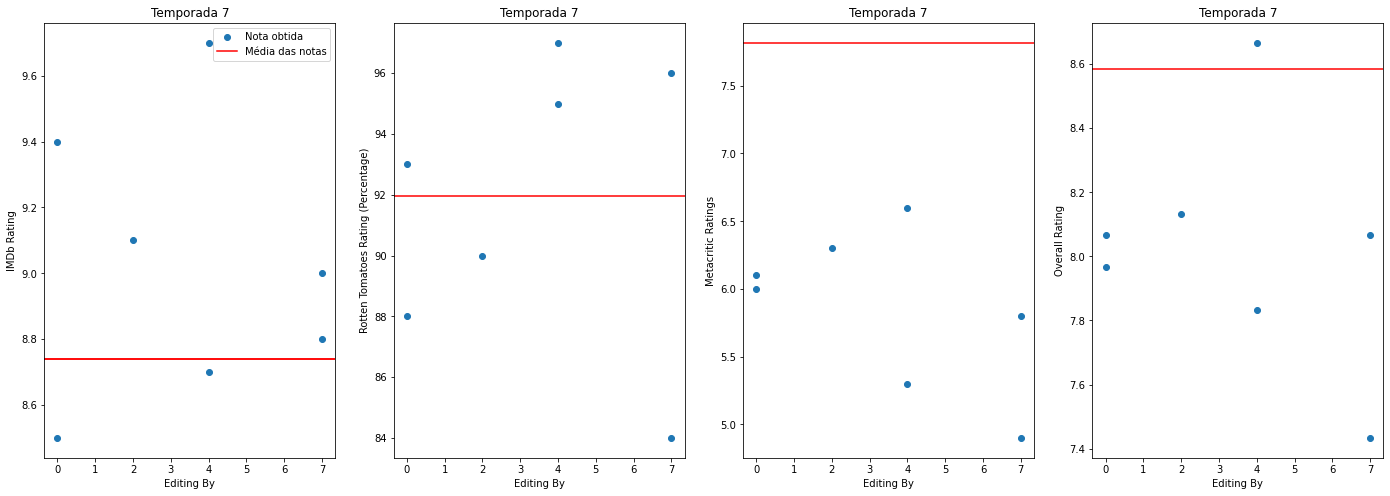

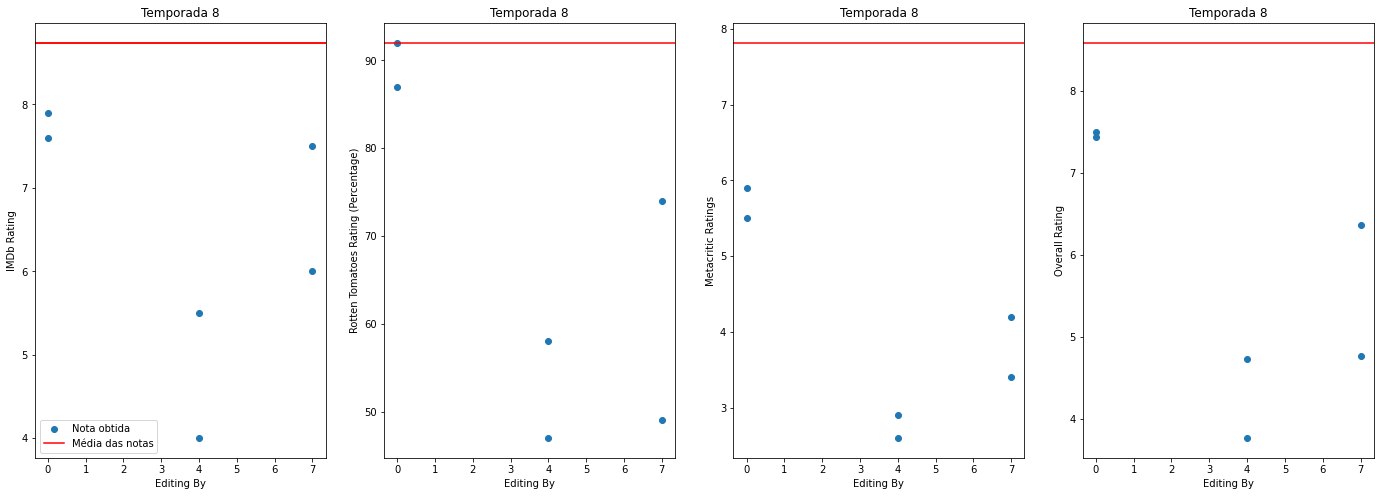

In [13]:
for label, df in final_df.groupby('Season'):
    fig, ax = plt.subplots(figsize=(24,8))
    # IMDb Rating
    plt.subplot(1, 4, 1)
    plt.scatter(x = df['Editing by'], y = df['IMDb Rating'], label='Nota obtida')
    plt.xticks(range(0, max(df['Editing by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Editing By')
    plt.ylabel('IMDb Rating')
    plt.axhline(final_df["IMDb Rating"].mean(), color='r');
    plt.axhline(final_df["IMDb Rating"].mean(), color='r', label='Média das notas');
    plt.legend()
    
    # Rotten Tomatoes Rating (Percentage)
    plt.subplot(1, 4, 2)
    plt.scatter(x = df['Editing by'], y = df['Rotten Tomatoes Rating (Percentage)'])
    plt.xticks(range(0, max(df['Editing by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Editing By')
    plt.ylabel('Rotten Tomatoes Rating (Percentage)')
    plt.axhline(final_df["Rotten Tomatoes Rating (Percentage)"].mean(), color='r');
    
    # Rotten Tomatoes Rating (Percentage)
    plt.subplot(1, 4, 3)
    plt.scatter(x = df['Editing by'], y = df['Metacritic Ratings'])
    plt.xticks(range(0, max(df['Editing by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Editing By')
    plt.ylabel('Metacritic Ratings')
    plt.axhline(final_df["Metacritic Ratings"].mean(), color='r');
    
    # Overall Rating
    plt.subplot(1, 4, 4)
    plt.scatter(x = df['Editing by'], y = df['Overall Rating'])
    plt.xticks(range(0, max(df['Editing by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Editing By')
    plt.ylabel('Overall Rating')
    plt.axhline(final_df["Overall Rating"].mean(), color='r');
    _ = plt.show()

### Cinematography by

Nas temporadas iniciais os profissionais de cinematografia se concentram com os indivíduos 1, 9, 10 e 11 e os episódios onde tais pessoas trabalharam apresentaram boas avaliações. Por outro lado, os episódios das temporadas finais tiveram a cinematografia feita mais pelos indivíduos 3, 4, 7, 12, 14 e a nota apresentou-se abaixo da média mostrando uma possível relação entre os profissionais de cinematografia e as notas obtidas.

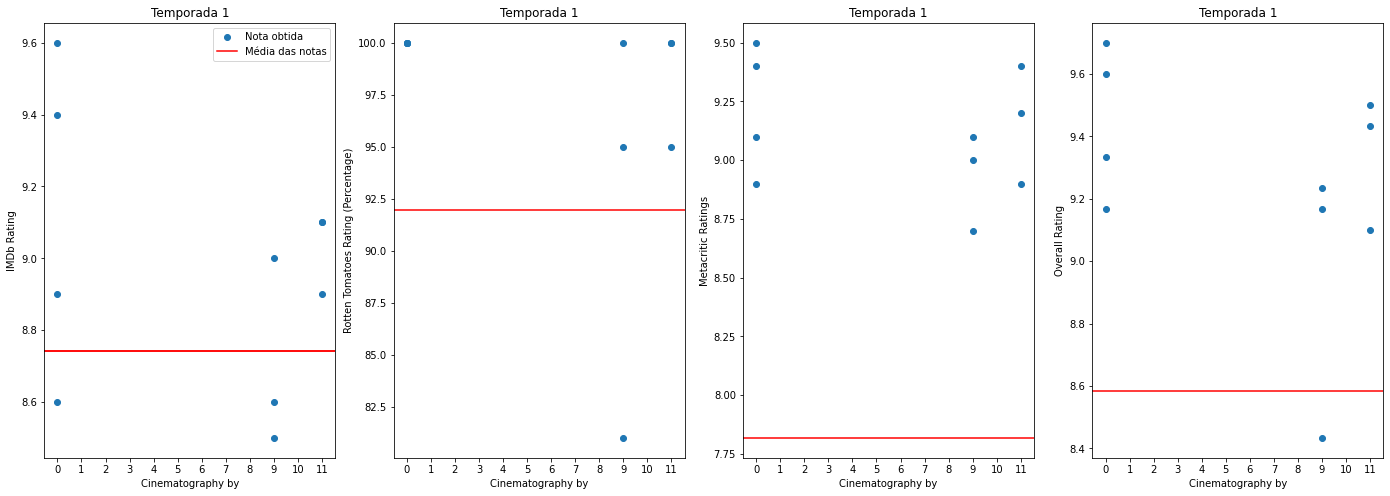

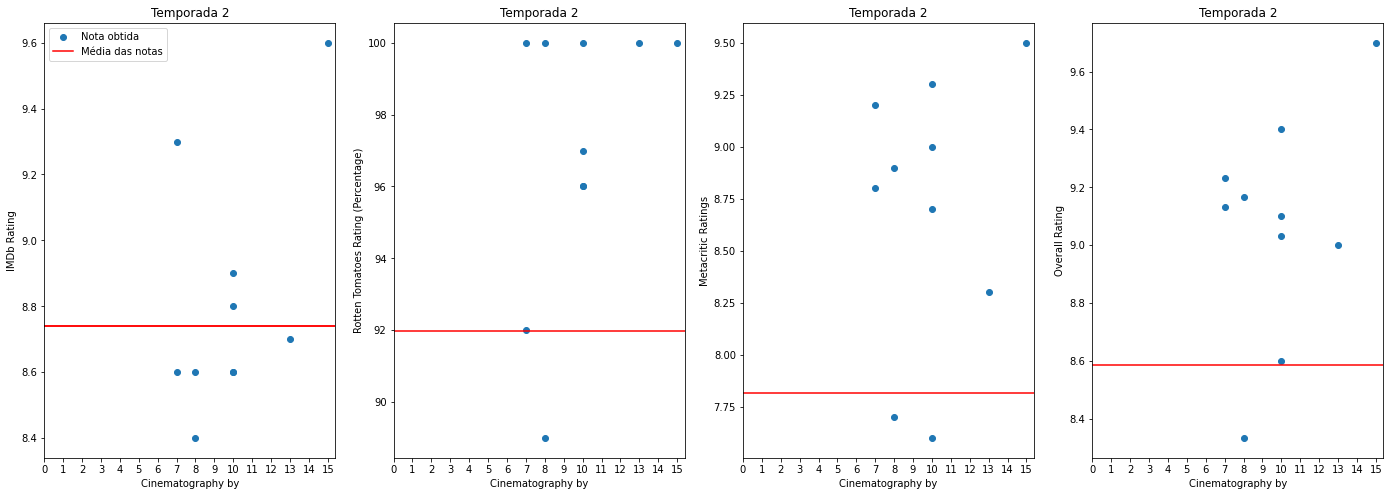

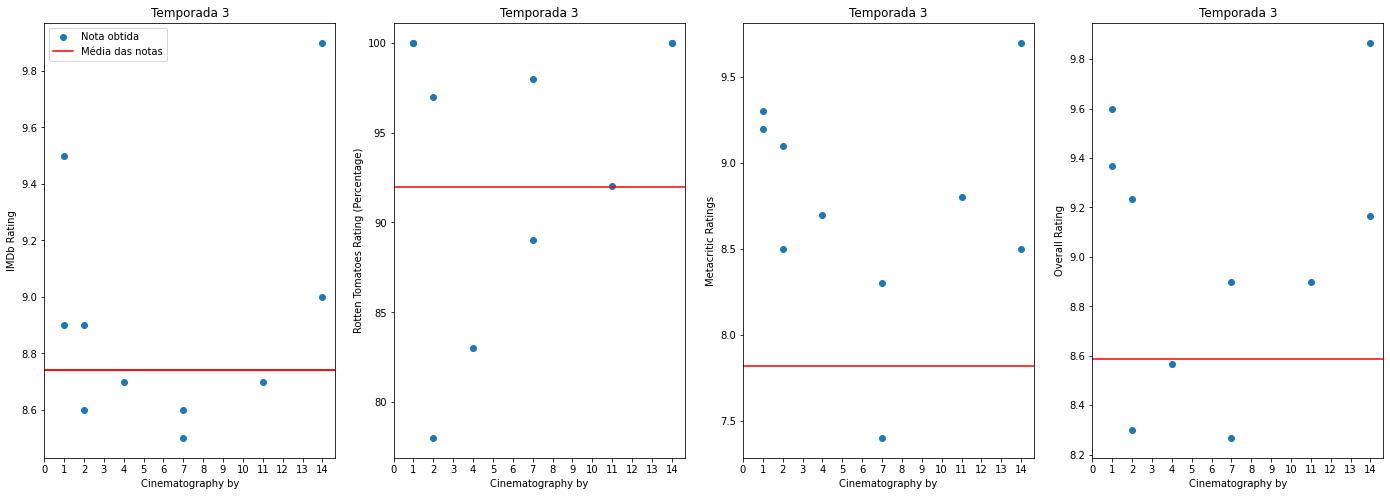

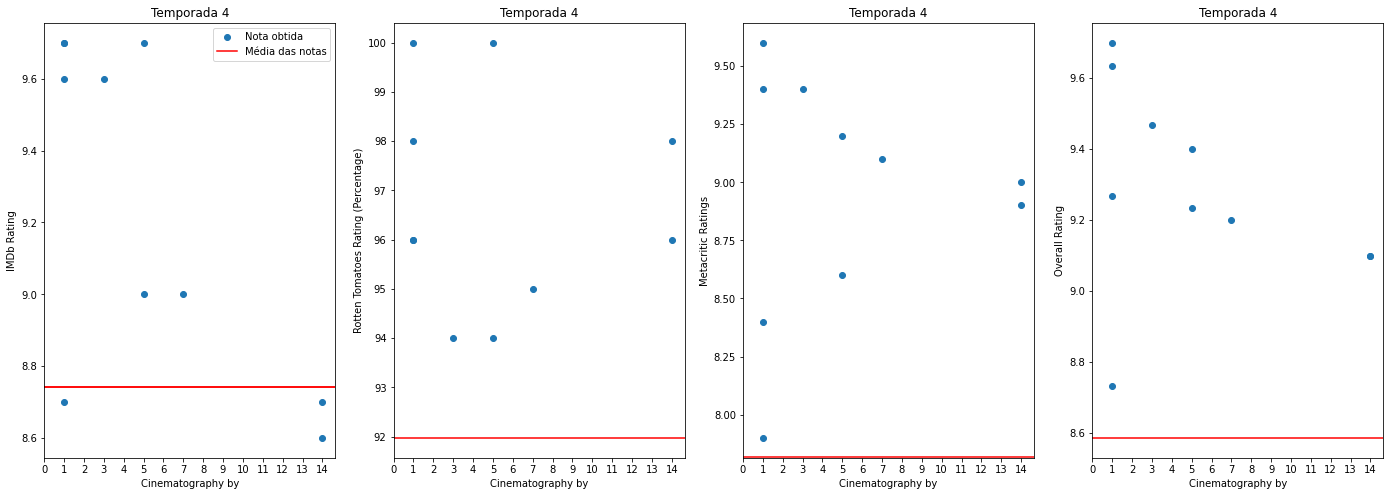

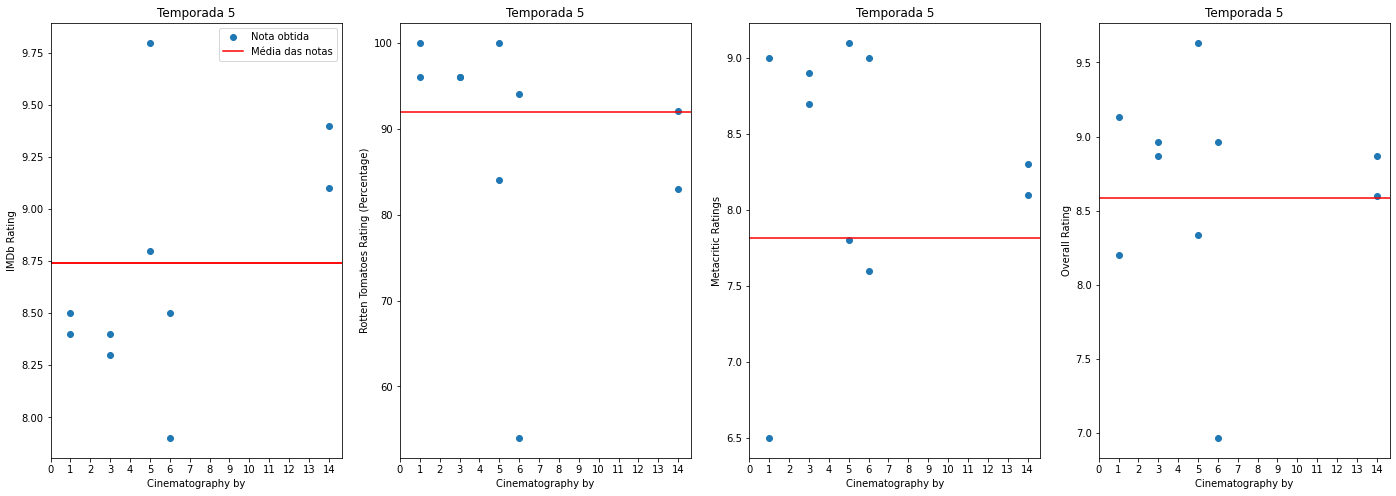

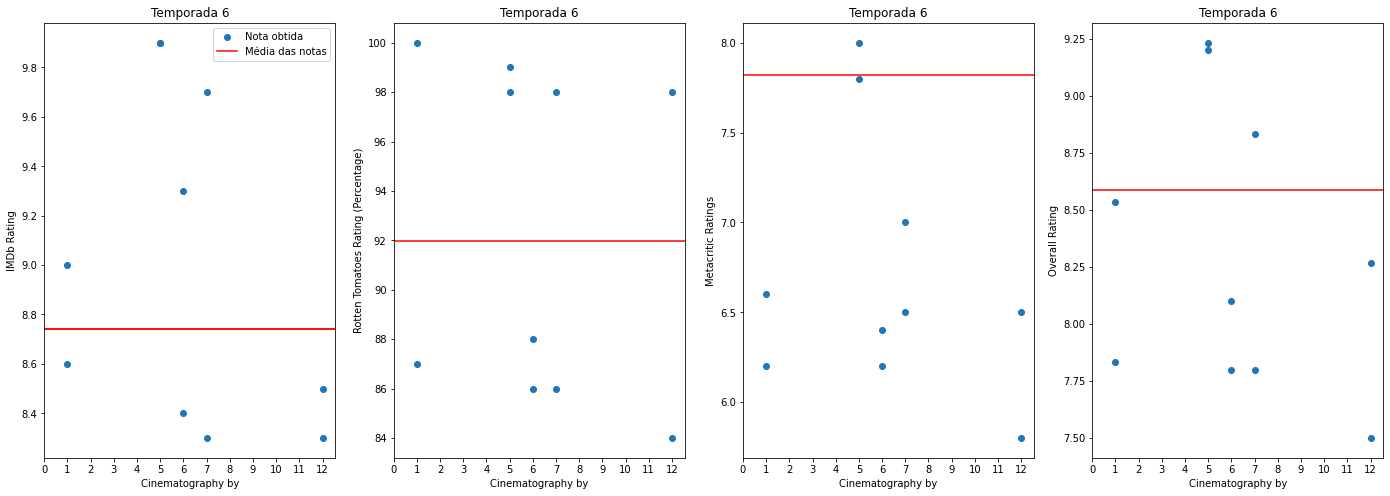

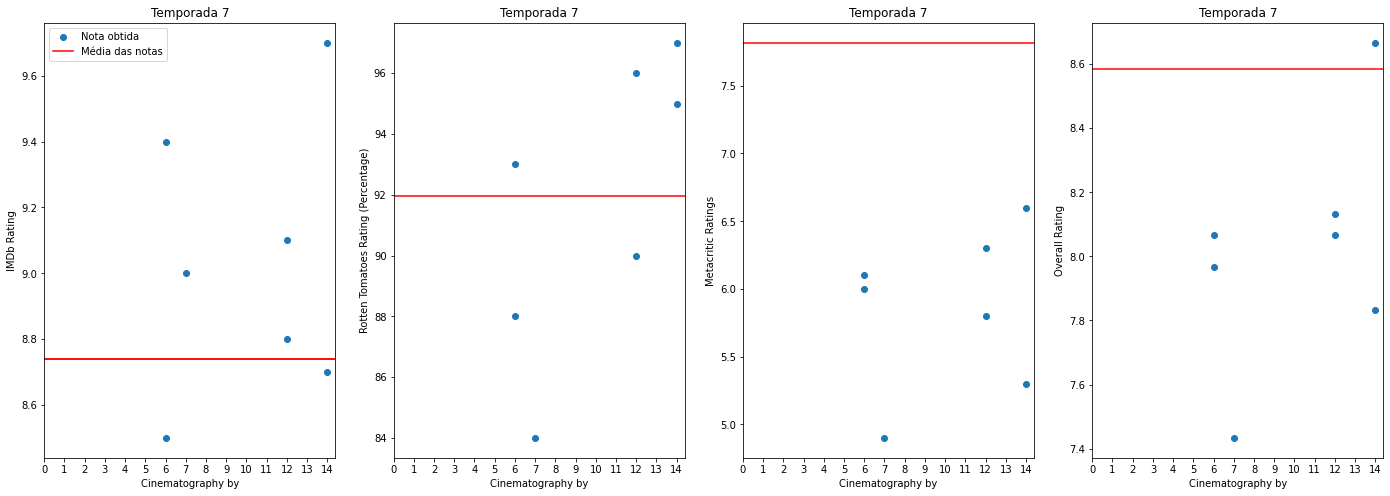

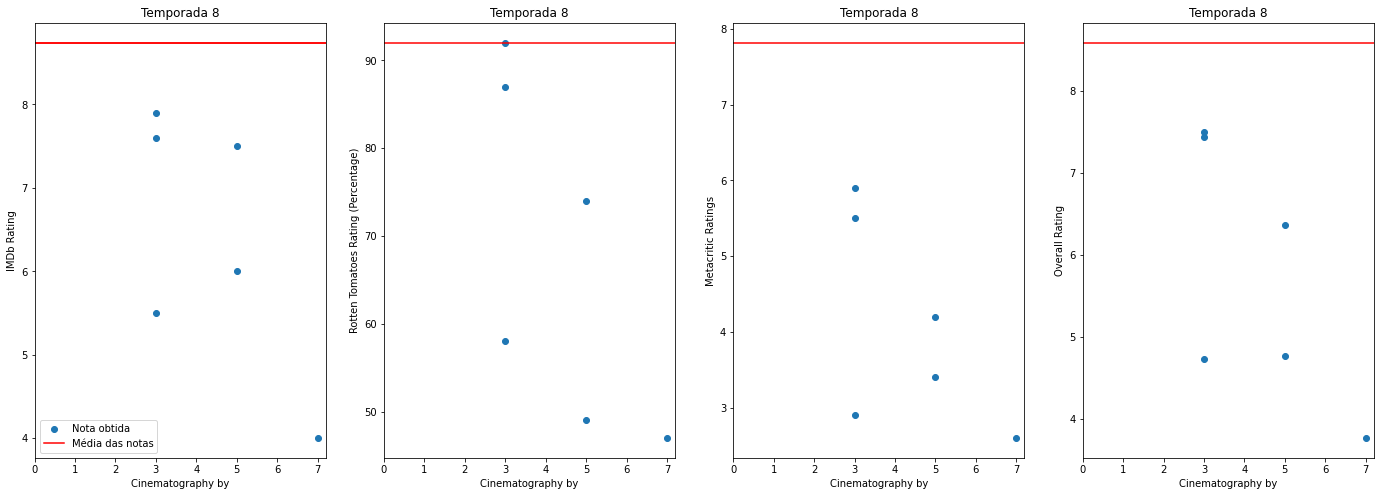

In [14]:
for label, df in final_df.groupby('Season'):
    fig, ax = plt.subplots(figsize=(24,8))
    # IMDb Rating
    plt.subplot(1, 4, 1)
    plt.scatter(x = df['Cinematography by'], y = df['IMDb Rating'], label='Nota obtida')
    plt.xticks(range(0, max(df['Cinematography by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Cinematography by')
    plt.ylabel('IMDb Rating')
    plt.axhline(final_df["IMDb Rating"].mean(), color='r');
    plt.axhline(final_df["IMDb Rating"].mean(), color='r', label='Média das notas');
    plt.legend()
    
    # Rotten Tomatoes Rating (Percentage)
    plt.subplot(1, 4, 2)
    plt.scatter(x = df['Cinematography by'], y = df['Rotten Tomatoes Rating (Percentage)'])
    plt.xticks(range(0, max(df['Cinematography by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Cinematography by')
    plt.ylabel('Rotten Tomatoes Rating (Percentage)')
    plt.axhline(final_df["Rotten Tomatoes Rating (Percentage)"].mean(), color='r');
    
    # Rotten Tomatoes Rating (Percentage)
    plt.subplot(1, 4, 3)
    plt.scatter(x = df['Cinematography by'], y = df['Metacritic Ratings'])
    plt.xticks(range(0, max(df['Cinematography by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Cinematography by')
    plt.ylabel('Metacritic Ratings')
    plt.axhline(final_df["Metacritic Ratings"].mean(), color='r');
    
    # Overall Rating
    plt.subplot(1, 4, 4)
    plt.scatter(x = df['Cinematography by'], y = df['Overall Rating'])
    plt.xticks(range(0, max(df['Cinematography by']) + 1, 1))
    plt.title(f'Temporada {label}')
    plt.xlabel('Cinematography by')
    plt.ylabel('Overall Rating')
    plt.axhline(final_df["Overall Rating"].mean(), color='r');
    _ = plt.show()

#### a) o que você aprendeu com esta atividade? 

Como formatar legenda de traçados em gráficos, agrupar dados dado uma coluna ou condição e como plotar dados conforme eles estão agrupados.

#### b) como aprimorar o que você já fez?

Talvez traçando uma média das notas de cada profissional ou fazendo uma análise individual de cada um.